# Play Store Apps-Data Visualization And Analysis

<b> The main objective of this project is analyze the google play store user's sentiments, explore and provide necessary feedbacks by visually displaying the data. The dataset contains different features like Category, Genres, Size, App ,and more.</b>

In [176]:
pip install opendatasets --quiet

<b> Here, I have installed opendatasets library that will help us directly download the dataset from kaggle. </b>

In [177]:
import opendatasets as od
import os

In [178]:
url = 'https://www.kaggle.com/lava18/google-play-store-apps'
od.download(url)

Skipping, found downloaded files in "./google-play-store-apps" (use force=True to force download)


In [179]:
os.listdir('google-play-store-apps')

['license.txt', 'googleplaystore_user_reviews.csv', 'googleplaystore.csv']

In [180]:
# lets import our fundamental libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [181]:
# lets import pandas library to load the downloaded files into pandas dataframe
apps_df = pd.read_csv('google-play-store-apps/googleplaystore.csv')
reviews_df = pd.read_csv('google-play-store-apps/googleplaystore_user_reviews.csv')

In [182]:
apps_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [183]:
reviews_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


# preprocessing and Feature Engineering

## Cleaning apps_df dataframe

In [184]:
apps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [185]:
apps_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [186]:
cols_with_null_values = []
null_count = []

all_cols = apps_df.columns.tolist()

In [187]:
for i in all_cols:
  if (apps_df[i].isnull().sum() != 0):
    cols_with_null_values.append(i)
    null_count.append(apps_df[i].isnull().sum())

In [188]:
print(cols_with_null_values)
print(null_count)

['Rating', 'Type', 'Content Rating', 'Current Ver', 'Android Ver']
[1474, 1, 1, 8, 3]


<b> So, we can clearly see that Rating has more than 1400 nan values, unlike in other columns, where missing values are comparatively less. </b>

### Cleaning Rating column

In [189]:
apps_df.Rating.isnull().sum()

1474

In [190]:
length = (apps_df.Rating).size
length

10841

In [191]:
list_with_null_rowsno = list(dict(apps_df.Rating[apps_df.Rating.isnull() == True]).keys())

In [192]:
# lets fill the 'NAN' values from the ratings column

for i in list_with_null_rowsno:
  mean = apps_df.Rating.mean()
  stand_dev = apps_df.Rating.std()
    
  random_value = np.random.choice([mean+stand_dev, mean-stand_dev])
  apps_df.Rating.replace(to_replace = apps_df['Rating'].loc[i], value = random_value, inplace = True)    

In [193]:
apps_df.Rating.isnull().sum()

0

<b> Actucally, what happens is a loop is executed for every row in the `Rating` column of the dataframe. In the loop, when a certain row is selected, if the respective value is `NAN`, the if statement executes and replaces the `NAN` value by selecting between mean+std and mean-std. In this way, the entire Rating column is cleaned of the null/NAN values respectively. </b>

In [194]:
apps_df.Rating.isnull().sum()

0

### Cleaning Type Column

In [195]:
# lets clearn Type column from 1 null values
dict(apps_df.Type.value_counts())

{'0': 1, 'Free': 10039, 'Paid': 800}

Since majority of apps are free, I will fill the null value with Free.

In [196]:
print(apps_df.Type.isnull().sum())
apps_df.Type.replace(to_replace=np.nan,value = 'Free',inplace = True)
print(apps_df.Type.isnull().sum())

1
0


### Cleaning Content Rating Column

In [197]:
apps_df['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [198]:
apps_df['Content Rating'].isnull().sum()

1

In [199]:
apps_df['Content Rating'].replace(to_replace=np.nan,value = 'Everyone',inplace = True)
apps_df['Content Rating'].isnull().sum()

0

### Cleaning Current Version and Android Version columns

In [200]:
apps_df['Current Ver'].isnull().sum()

8

In [201]:
apps_df['Current Ver'][apps_df['Current Ver'] == 'Varies with device'].count()

1459

Here, we will clean 8 null  values, and for `Varies with device`, we will leave it alone just as it is.

In [202]:
# Lets access the 8 null value rows from current version column
rows = dict(apps_df['Current Ver'][apps_df['Current Ver'].isnull()])

In [203]:
row_list = list(rows.keys())
row_list

[15, 1553, 6322, 6803, 7333, 7407, 7730, 10342]

In [204]:
for i in row_list:
  apps_df['Current Ver'].replace(to_replace = apps_df['Current Ver'].loc[i] , value = np.random.choice([apps_df['Current Ver'].loc[i-1], apps_df['Current Ver'].loc[i+1]]),inplace = True)

What actually has been done here is that, for every `NAN` value, it has been replaced between either value before it, or value after it that is randomly choosen by numpy's random function.

In [205]:
apps_df['Current Ver'].isnull().sum()

0

In [206]:
# Now's the turn of "Android Version" column
apps_df['Android Ver'].isnull().sum()

3

In [207]:
apps_df['Android Ver'].value_counts()

4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
1.0 and up               2
5.0 - 8.0                2
4.0.3 - 7.1.1            2
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
7.0 - 7.1.1              1
4.1 - 7.1.1              1
Name: Android Ver, dtype: int64

In [208]:
row_list = list(dict(apps_df['Android Ver'][apps_df['Android Ver'].isnull()]).keys())

In [209]:
row_list

[4453, 4490, 10472]

In [210]:
for i in row_list:
  apps_df['Android Ver'].replace(to_replace = apps_df['Android Ver'].loc[i] , value = np.random.choice([apps_df['Android Ver'].loc[i-1], apps_df['Android Ver'].loc[i+1]]),inplace = True)

<b> Exactly what had been done previously has been repeated without any change in the core method respectively. </b>

In [211]:
apps_df['Android Ver'].isnull().sum()

0

Thus, in this way, all the columns of the apps_df column have been relieved of `NAN` values.

In [212]:
# remove any duplicate rows/values if present in the apps_df dataframe
apps_df.drop_duplicates(inplace = True)

In [213]:
apps_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

We can clearly see that the number of rows has declined. But I have not dropped any rows. Thus, we can conclude that there were some duplicates, and they have been dropped which resulted in the decrement of total number of rows respectively.

## Cleaning reviews_df dataframe

In [214]:
reviews_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


Just by having a short glimpse of the dataframe, we can clearly see or predict that we will be doing a lots of cleaning for null values for pretty much every column.

In [215]:
cols_with_null = list(dict(reviews_df.isnull().sum()).keys())[1:]
cols_with_null

['Translated_Review',
 'Sentiment',
 'Sentiment_Polarity',
 'Sentiment_Subjectivity']

### Cleaning Translated_Review Column

In [216]:
reviews_df.Translated_Review.isnull().sum()

26868

There is no practical way to fill up the reviews for an app by filling the `NAN` values with some other reviews. Therefore, I have decided to replace the NAN with "not given".

In [217]:
reviews_df.Translated_Review.replace(to_replace= np.nan, value =  'not given', inplace = True)

### Cleaning Remaining Sentiment Related Columns

In [218]:
reviews_df['Sentiment'].isnull().sum()

26863

In [219]:
reviews_df['Sentiment_Polarity'].isnull().sum()

26863

In [220]:
reviews_df['Sentiment_Subjectivity'].isnull().sum()

26863

Well, We can clearly see that there is a trend among the null values in the last 3 sentiment related columns in the reviews_df dataframe. Maybe, the coincidence is such that, if in among those 3 columns, if one column has null value, all remaining 2 also have null values. Lets verify if this condition is true or not.

In [221]:
d1 = reviews_df[reviews_df['Sentiment'].isnull()]

In [222]:
d2 = reviews_df[reviews_df['Sentiment_Polarity'].isnull()]

In [223]:
d3 = reviews_df[reviews_df['Sentiment_Subjectivity'].isnull()]

In [224]:
pd.DataFrame.equals(d1,d2)

True

In [225]:
pd.DataFrame.equals(d3,d2)

True

<b> Thus, d1 == d2 == d3. Hence, we can conclude that for all sentiment features, if either featurs's certain row contains NAN value, the corresponding rows of other two features will also contain NAN values.</b>

In [226]:
reviews_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,not given,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,not given,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,not given,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,not given,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,not given,NaN,NaN,NaN


<b> For Sentiment Column </b>

In [227]:
# regular value_counts() method retuns number of occurrence of unique values
# dataframe.column.count() total values of a column excluding NAN values
reviews_df.Sentiment.value_counts()/(reviews_df.Sentiment.count())     

Positive    0.641109
Negative    0.220961
Neutral     0.137930
Name: Sentiment, dtype: float64

Significant number of values in Sentiment columns are positive. The probability of positive value is 0.64. But, it doesnot makes sense to fill in the NAN values randomly for this column randomly because the reviews column will have either a positive,negative, or a neutral response.

In [228]:
probability = list(reviews_df.Sentiment.value_counts()/(reviews_df.Sentiment.count()))
probability

[0.6411092113699508, 0.22096067535798247, 0.13793011327206667]

It makes best sense to fill the null values with `not given`. So, lets do that.

In [229]:
reviews_df.Sentiment.fillna('not given',inplace = True)

In [230]:
reviews_df.Sentiment.isnull().sum()

0

<b> For Sentiment_Polarity Column </b>

Since we have proved that for the sentiment columns, if one of the column's row has NAN value, all other corresponding rows of columns will have NAN value. And we have replaced NAN values from `Sentiment` column with `not given`. Thus, it best to not replace the null values in the next two columns even if these are numeric column as they are interconnected. Thus, lets simply add `not given` for these columns as well.

In [231]:
reviews_df.Sentiment_Polarity.isnull().sum()

26863

In [232]:
reviews_df.Sentiment_Polarity.fillna('not given',inplace = True)

In [233]:
reviews_df.Sentiment_Polarity.isnull().sum()

0

<b> For Sentiment_Subjectivity Column

In [234]:
reviews_df.Sentiment_Subjectivity.isnull().sum()

26863

In [235]:
reviews_df.Sentiment_Subjectivity.fillna('not given',inplace = True)

In [236]:
reviews_df.Sentiment_Subjectivity.isnull().sum()

0

Hence, all the columns in both dataframes are cleaned.

### Final Checking

In [237]:
reviews_df.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [238]:
apps_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

## Feature Engineering

### For Installs column

In [239]:
apps_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",0.1.8,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",0.1.8,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.500000,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",0.1.8,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,3.606622,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",0.1.8,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.500000,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",0.1.8,Varies with device


<b> Removing + from Installs column to convert it into fully numeric column</b>

In [240]:
apps_df.Installs = apps_df.Installs.map(lambda x : x.rstrip('+'))

In [241]:
apps_df.Installs = apps_df.Installs.str.replace(",","")

We can see that the reviews_df dataframe has less apps than 

In [242]:
apps_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",0.1.8,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",0.1.8,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.500000,38,53M,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,3.6M,100,Free,0,Everyone,Education,"July 6, 2018",0.1.8,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,3.606622,3,9.5M,1000,Free,0,Everyone,Medical,"January 20, 2017",0.1.8,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.500000,114,Varies with device,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",0.1.8,Varies with device


In [243]:
apps_df.Installs.value_counts()

1000000       1488
10000000      1132
100000        1129
10000         1033
1000           890
100            710
5000000        683
500000         517
50000          474
5000           469
10             385
100000000      369
500            328
50000000       272
50             204
5               82
1               67
500000000       61
1000000000      49
0               15
Free             1
Name: Installs, dtype: int64

This column is supposed to have number values. However, we can see above that there is a string object Free. Lets find out which row has this value, and remove the entire row.


In [244]:
apps_df.Installs[apps_df.Installs.values == 'Free']

10472    Free
Name: Installs, dtype: object

We can see that, in the 10472th row, the Installs column has value Free. Lets check the entire row, and if we have a meaningful values in other column, we should replace the Free value. otherwise its best to delete the row entirely.

In [245]:
apps_df.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                                 19
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                   Everyone
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                  4.0.3 and up
Name: 10472, dtype: object

Lets remove the row. It seems its for the best.

In [246]:
apps_df.drop(index = [10472], inplace = True)

In [247]:
apps_df.Installs = apps_df.Installs.astype(int)

This means that the values in this column are python objects, or string. Lets convert these string numbers to pure numeric form.

In [248]:
apps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          10357 non-null  float64
 3   Reviews         10357 non-null  object 
 4   Size            10357 non-null  object 
 5   Installs        10357 non-null  int64  
 6   Type            10357 non-null  object 
 7   Price           10357 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10357 non-null  object 
 12  Android Ver     10357 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


Lets try to convert the respective columns as necessary.

### For Price column

In [249]:
apps_df.Price.value_counts()

0          9592
$0.99       146
$2.99       125
$1.99        73
$4.99        70
           ... 
$1.76         1
$46.99        1
$154.99       1
$1.96         1
$2.59         1
Name: Price, Length: 92, dtype: int64

As we can see that there is `$` sign before price value. And, the data type of this column's values is object. Thus, lets remove `$` and make this column numeric as well.

In [250]:
# removing '$' and converting to numeric column
apps_df.Price = apps_df.Price.str.replace('$','')

In [251]:
apps_df.Price = pd.to_numeric(apps_df.Price)

In [252]:
apps_df.Price.dtype

dtype('float64')

Thus, this column has now been cleaned.

### For Reviews column

In [253]:
apps_df.Reviews.value_counts()

0        593
1        272
2        213
3        170
4        137
        ... 
36893      1
58820      1
6512       1
10270      1
16129      1
Name: Reviews, Length: 6001, dtype: int64

In [254]:
apps_df.Reviews = pd.to_numeric(apps_df.Reviews)

In [255]:
apps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          10357 non-null  float64
 3   Reviews         10357 non-null  int64  
 4   Size            10357 non-null  object 
 5   Installs        10357 non-null  int64  
 6   Type            10357 non-null  object 
 7   Price           10357 non-null  float64
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10357 non-null  object 
 12  Android Ver     10357 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.1+ MB


### For Size column

In [256]:
apps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",0.1.8,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",0.1.8,4.4 and up


In [257]:
apps_df.Size.dtype

dtype('O')

In [258]:
apps_df.Size.value_counts()

Varies with device    1526
11M                    188
12M                    186
13M                    186
14M                    182
                      ... 
613k                     1
720k                     1
54k                      1
930k                     1
629k                     1
Name: Size, Length: 461, dtype: int64

Since a Size of app is generally supposed to be in MB or GB. We can see that, in the Size column, the apps size is in both Mega byte and Kilo byte. For simplicity for data analysis and visualization, lets convert all the size values into MB for this column.

For this column, we have mainly 4 different steps:

1. Removing varies with device and replacing with `NaN`.
2. Removing M from the value, if present.
3. Removing k from the value, if present.
4. Dividing the KB value by 1024, to convert into a regular MB size.

After completing these steps, our feature engineering for this particular column will be completed.

In [259]:
# Removing M from values in Size column, if present
apps_df.Size = apps_df.Size.map(lambda x : str(x).replace('M','') if 'M' in str(x) else x)

In [260]:
# Removing 'varies with device' and replacing with 'NaN'
apps_df.Size = apps_df.Size.map(lambda x : str(x).replace('Varies with device','NaN') if 'Varies with device' in str(x) else x)

In [261]:
# Replacing ',' for kb values
apps_df.Size = apps_df.Size.map(lambda x : str(x).replace(',','') if ',' in str(x) else x)

In [262]:
# converting 'KB' into by and dividing kb values by 1024
apps_df.Size = apps_df.Size.map(lambda x : float(str(x).replace('k',''))/1024 if 'k' in str(x) else x)

# converting all values into float
apps_df.Size = apps_df.Size.apply(lambda x : float(x))

In [263]:
# Rouding all values to 3 decimal spaces
apps_df.Size = apps_df.Size.apply(lambda x : round(x,3))

In [264]:
apps_df.Size.dtype

dtype('float64')

Now that we have performed necessary Data Cleaning, and Feature Engineering, It is time to perform exploratory data analysis and visualization. 

### Final Check

In [265]:
# checking if any duplicates are left or not
apps_df.duplicated().sum().any()        # .any() returns False for 0 and True if not 0 (if duplicates are available)

False

In [266]:
apps_df.App.value_counts()

ROBLOX                            9
8 Ball Pool                       7
Zombie Catchers                   6
Helix Jump                        6
Bubble Shooter                    6
                                 ..
Toys Defense: Horror Land         1
EZ Video Download for Facebook    1
Block Gun 3D: Haunted Hollow      1
Konferencija.eu                   1
Transport DK                      1
Name: App, Length: 9659, dtype: int64

From this, we can draw a conclusion that there could be apps for which there are multiple rows. So, in that case, every other column other than reviews will have same values because they are for the same value. Similarly, its best to choose the row for which the reviews are maximum as it denotes that the particular row contains the latest data as it has maximum reviews. So, lets go with this idea and perform the operation to select unique apps that have maximum values in reviews number column.

This proves that there are multiple apps with same values in all columns, and different values in reviews column. Thus, It is best to update our dataframe such that it will have necessary information for unique apps respectively.

# Data Visualization

In [267]:
apps_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",0.1.8,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",0.1.8,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.500000,38,53.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,3.6,100,Free,0.0,Everyone,Education,"July 6, 2018",0.1.8,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,3.606622,3,9.5,1000,Free,0.0,Everyone,Medical,"January 20, 2017",0.1.8,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.500000,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",0.1.8,Varies with device


In [268]:
# lets import the data visualization tools and libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
%matplotlib inline

sns.set_style('darkgrid')
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (20, 10)

plt.rcParams['figure.facecolor'] = '#00000000'

#### What are the top 25 Apps on the play store that have been downloaded the most times?

In [269]:
# the code below helps to count the apps repeated or apps's total number in the apps_df dataframe
apps = dict(apps_df.App.value_counts())

# using the above dictionary to create new dictionary to create a new dataframe
apps_dataframe = {
    'App':list(apps.keys()),
    'Count':list(apps.values())
}

# Creating the DataFrame from the dictionary above
top_apps = pd.DataFrame(apps_dataframe)
top_apps

,App,Count
0,ROBLOX,9
1,8 Ball Pool,7
2,Zombie Catchers,6
3,Helix Jump,6
4,Bubble Shooter,6
...,...,...
9654,Toys Defense: Horror Land,1
9655,EZ Video Download for Facebook,1
9656,Block Gun 3D: Haunted Hollow,1
9657,Konferencija.eu,1


In [270]:
# This returns a dataframe that contains apps with their maximum installs
apps_total_installs = apps_df.groupby('App')[['Installs']].max()
apps_total_installs

,Installs
App,
"""i DT"" Fútbol. Todos Somos Técnicos.",500
+Download 4 Instagram Twitter,1000000
- Free Comics - Comic Apps,10000
.R,10000
/u/app,10000
...,...
"뽕티비 - 개인방송, 인터넷방송, BJ방송",100000
💎 I'm rich,10000
"💘 WhatsLov: Smileys of love, stickers and GIF",1000000


In [271]:
# Merging the two previous dataframes into a one dataframe ,and sorting it with accordance to top 25 highest Install values from it.
highest_25_apps_accordingto_installs = top_apps.merge(apps_total_installs, on = 'App', how = 'left').sort_values('Installs',ascending = False).head(25)

In [272]:
highest_25_apps_accordingto_installs

,App,Count,Installs
381,Gmail,2,1000000000
286,WhatsApp Messenger,2,1000000000
453,Google,2,1000000000
444,Google+,2,1000000000
188,YouTube,2,1000000000
509,Messenger – Text and Video Chat for Free,2,1000000000
329,Google Play Games,2,1000000000
111,Instagram,3,1000000000
60,Maps - Navigate & Explore,3,1000000000
108,Google News,3,1000000000


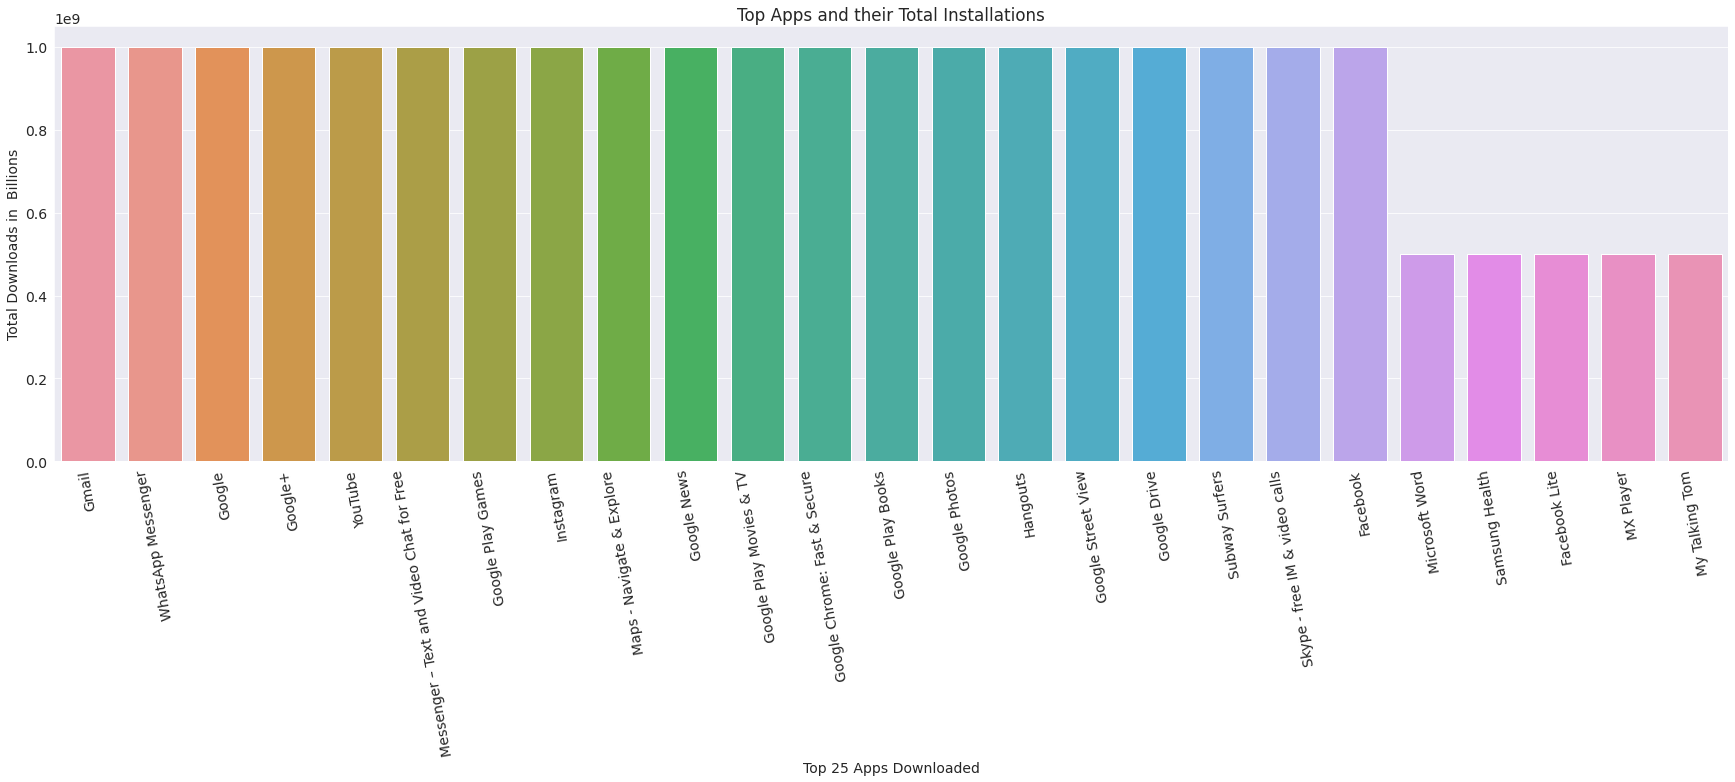

In [273]:
# Plotting our bar graph: Top Apps and their Installations
plt.figure(figsize=(30,8))
plt.xticks(rotation=100)
sns.barplot(x = highest_25_apps_accordingto_installs.App, y = highest_25_apps_accordingto_installs.Installs)
plt.title("Top Apps and their Total Installations")
plt.xlabel("Top 25 Apps Downloaded")
plt.ylabel("Total Downloads in  Billions")
plt.show();

From the bar diagram above, we can clearly see that top 20 most downloaded apps in play store have been downloaded more than 1 billion times each. We can also find that majority of apps in the top 25 download list are from social networking or international companies like google, facebook ,and microsoft. Other are either Mobile games like subway surfers or apps similar to social services. We can make a conclusion that the number of users downloading or using android mobiles is extremely high and is also increasing. This is because the top applications are being downloaded for a billions of times ,which effectively shows that the number of android users is increasing dramatically.

### What are the top 25 Genres on Play store based on their count?

In [274]:
# using value_counts() to count the occurrence of individual Genres in the Genre column ,and storing a resultant as a dictionary
dict1 = dict(apps_df.Genres.value_counts())

# Using the dictionary above to create a new dictionary
dataframe = {'Genres':list(dict1.keys()),
             'Count':list(dict1.values())}

# Converting the dictionary above into a dataframe
top_genres = pd.DataFrame(dataframe)
top_genres

,Genres,Count
0,Tools,842
1,Entertainment,588
2,Education,527
3,Business,427
4,Medical,408
...,...,...
114,Health & Fitness;Action & Adventure,1
115,Strategy;Education,1
116,Music & Audio;Music & Video,1
117,Trivia;Education,1


Since we have previously found out that there are different apps belonging to various generes. So, there are cases when multiple apps belonging to same genre. And, these different apps are downloaded for a number of times. Even though these apps are different, they may belong in the same genre. Thus, we can conclude that we can take sum of total installs of different apps belonging to a certain genre ,which can be taken as the total number of installs of application of that genre.

In [275]:
# a new dataframe that consists of Genres and their total installs
genre_total_installs = apps_df.groupby('Genres')[['Installs']].sum()
genre_total_installs

,Installs
Genres,
Action,8336039190
Action;Action & Adventure,73020500
Adventure,406695320
Adventure;Action & Adventure,906150000
Adventure;Brain Games,100000
...,...
Video Players & Editors,6207002720
Video Players & Editors;Creativity,10000000
Video Players & Editors;Music & Video,25000000


In [276]:
# lets join the previous two dataframes
highest_25_genres_accordingto_installs = top_genres.merge(genre_total_installs, on = 'Genres',how = 'left').sort_values('Count',ascending = False).head(25)
highest_25_genres_accordingto_installs

,Genres,Count,Installs
0,Tools,842,11442771915
1,Entertainment,588,4680714684
2,Education,527,373410148
3,Business,427,863664865
4,Medical,408,42204177
5,Productivity,407,12463091369
6,Personalization,388,2074494782
7,Lifestyle,372,524823539
8,Communication,366,24152276251
9,Sports,364,2544574498


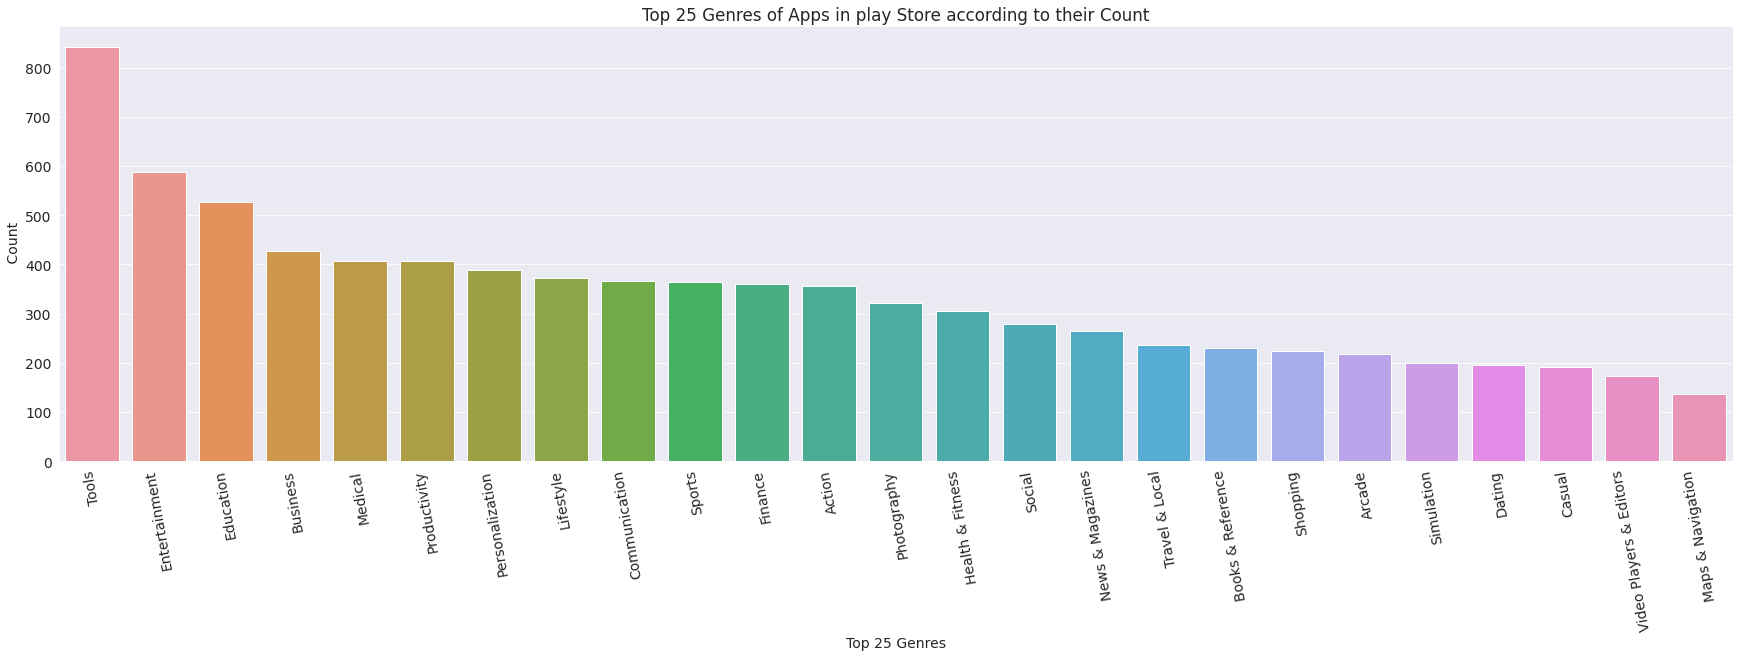

In [277]:
# plotting the graph: Top 25 Genres on the basis of their Count
plt.figure(figsize=(30,8))
plt.xticks(rotation=100)
sns.barplot(x = highest_25_genres_accordingto_installs.Genres, y = highest_25_genres_accordingto_installs.Count)
plt.title('Top 25 Genres of Apps in play Store according to their Count')
plt.xlabel('Top 25 Genres')
plt.ylabel(' Count');

From the bar diagram above, we can say that there are more than 800 apps that belong to `Tools` genre in the google play store making it the most in the entire dataset. Similarly, the next genres with most apps are `Entertainment` and `Education` respectively. We can also make a conclusion that other than the `Tools` genre, all other top 25 genres have almost similar number of apps. It can be interpreted that the google's play store contains a number of apps belonging to varieties of Genres.

### What Genre of apps have the most installations?

In [278]:
# Sorting our dataframe with accordance  to Install coulumn being set to descending order
highest_25_genres_accordingto_installs = highest_25_genres_accordingto_installs.sort_values('Installs',ascending = False).head(25)
highest_25_genres_accordingto_installs

,Genres,Count,Installs
8,Communication,366,24152276251
14,Social,280,12513867902
5,Productivity,407,12463091369
0,Tools,842,11442771915
12,Photography,322,9721247655
19,Arcade,218,9717129155
22,Casual,191,8662830740
11,Action,356,8336039190
16,Travel & Local,236,6361787146
23,Video Players & Editors,173,6207002720


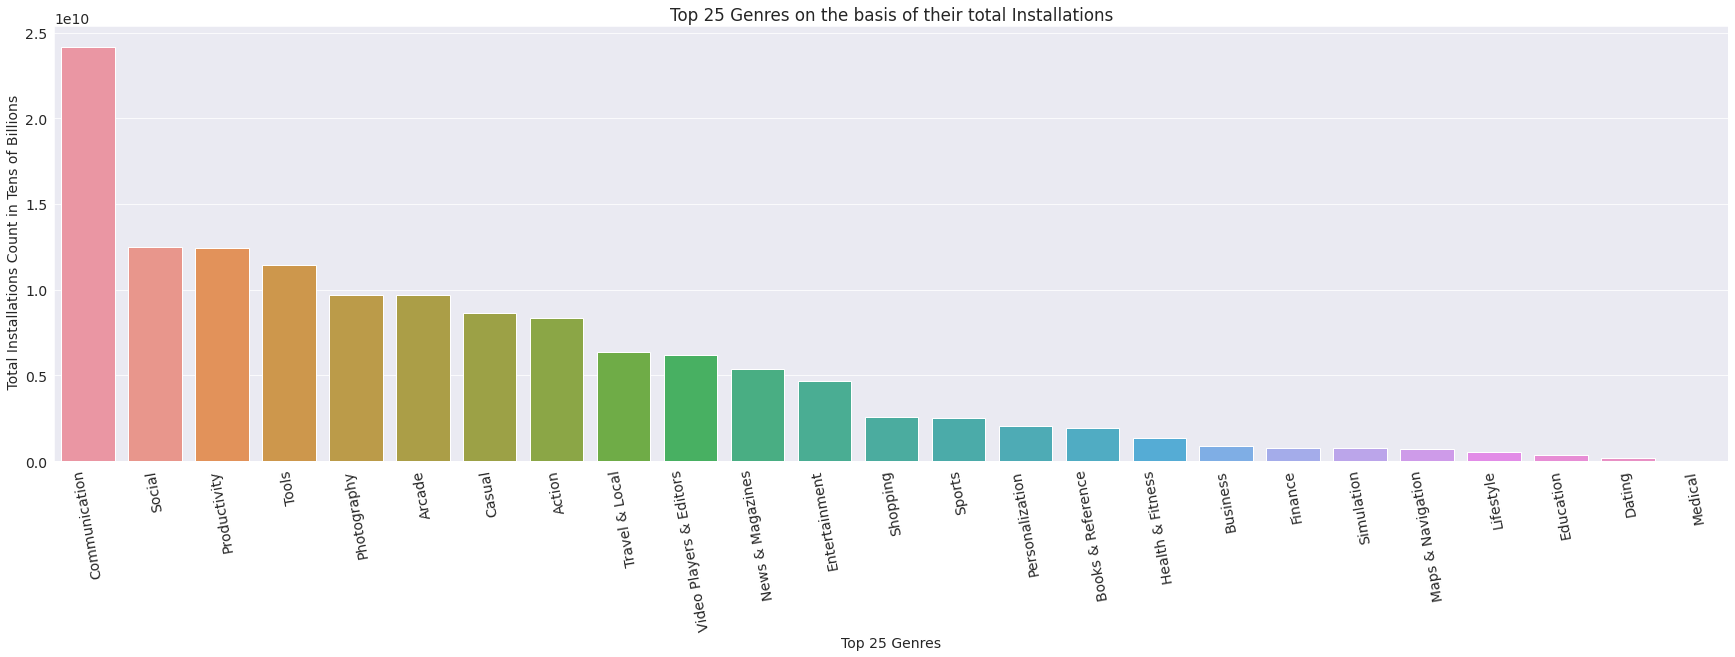

In [279]:
# plotting the graph: Top 25 Genres on the basis of their total Installations
plt.figure(figsize=(30,8))
plt.xticks(rotation=100)
sns.barplot(x = highest_25_genres_accordingto_installs.Genres, y = highest_25_genres_accordingto_installs.Installs)
plt.title('Top 25 Genres on the basis of their total Installations')
plt.xlabel('Top 25 Genres')
plt.ylabel(' Total Installations Count in Tens of Billions');

We can clearly see that the maxmimum installations of application belong to communication, Social and Productivity Genres. Similarly, in the top 25, Medical Apps have been downloaded the least number of times.

### Which category has most Apps?

In [280]:
# using value_counts() to count the occurrence of individual Category in the Category column ,and storing a resultant as a dictionary
dict1 = dict(apps_df.Category.value_counts())

# Using the dictionary above to create a new dictionary
dataframe = {'Category':list(dict1.keys()),
             'Count':list(dict1.values())}

# Converting the dictionary above into a dataframe
top_Category = pd.DataFrame(dataframe)
top_Category

,Category,Count
0,FAMILY,1943
1,GAME,1121
2,TOOLS,843
3,BUSINESS,427
4,MEDICAL,408
5,PRODUCTIVITY,407
6,PERSONALIZATION,388
7,LIFESTYLE,373
8,COMMUNICATION,366
9,FINANCE,360


In [281]:
# a new dataframe that consists of Category and their total installs
Category_total_installs = apps_df.groupby('Category')[['Installs']].sum()
Category_total_installs

,Installs
Category,
ART_AND_DESIGN,124338100
AUTO_AND_VEHICLES,53130211
BEAUTY,27197050
BOOKS_AND_REFERENCE,1916469576
BUSINESS,863664865
COMICS,56086150
COMMUNICATION,24152276251
DATING,206536107
EDUCATION,533952000


In [282]:
# lets join the previous two dataframes
highest_25_Category_accordingto_installs = top_Category.merge(Category_total_installs, on = 'Category',how = 'left').sort_values('Count',ascending = False).head(25)
highest_25_Category_accordingto_installs

,Category,Count,Installs
0,FAMILY,1943,10041692505
1,GAME,1121,31544024415
2,TOOLS,843,11452771915
3,BUSINESS,427,863664865
4,MEDICAL,408,42204177
5,PRODUCTIVITY,407,12463091369
6,PERSONALIZATION,388,2074494782
7,LIFESTYLE,373,534823539
8,COMMUNICATION,366,24152276251
9,FINANCE,360,770348734


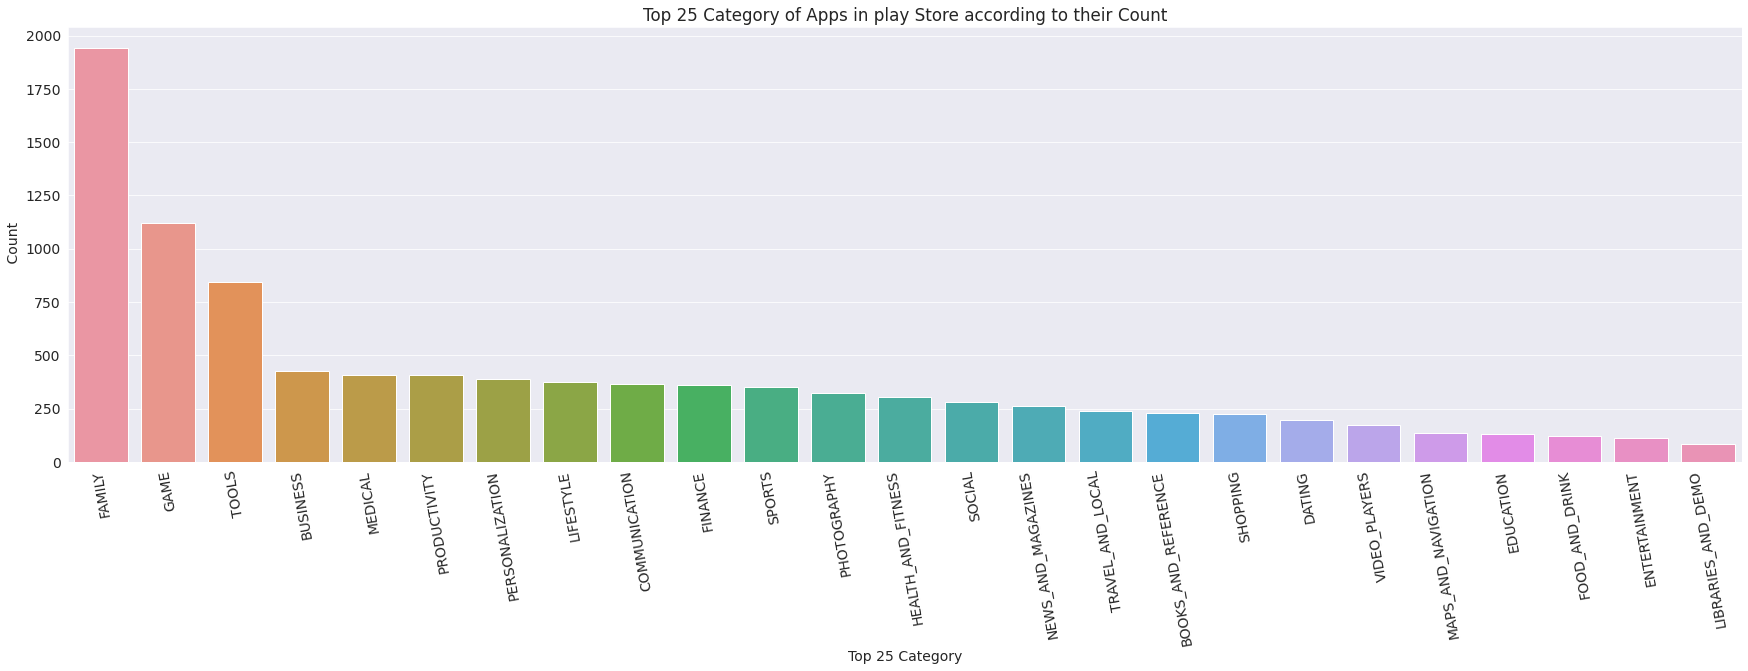

In [283]:
# plotting the graph: Top 25 Category on the basis of their Count
plt.figure(figsize=(30,8))
plt.xticks(rotation=100)
sns.barplot(x = highest_25_Category_accordingto_installs.Category, y = highest_25_Category_accordingto_installs.Count)
plt.title('Top 25 Category of Apps in play Store according to their Count')
plt.xlabel('Top 25 Category')
plt.ylabel(' Count');

### Which Category of Apps have most installations?

In [284]:
highest_25_Category_accordingto_installs = highest_25_Category_accordingto_installs.sort_values('Installs',ascending=False).head(25)
highest_25_Category_accordingto_installs

,Category,Count,Installs
1,GAME,1121,31544024415
8,COMMUNICATION,366,24152276251
13,SOCIAL,280,12513867902
5,PRODUCTIVITY,407,12463091369
2,TOOLS,843,11452771915
0,FAMILY,1943,10041692505
11,PHOTOGRAPHY,322,9721247655
15,TRAVEL_AND_LOCAL,237,6361887146
19,VIDEO_PLAYERS,175,6222002720
14,NEWS_AND_MAGAZINES,264,5393217760


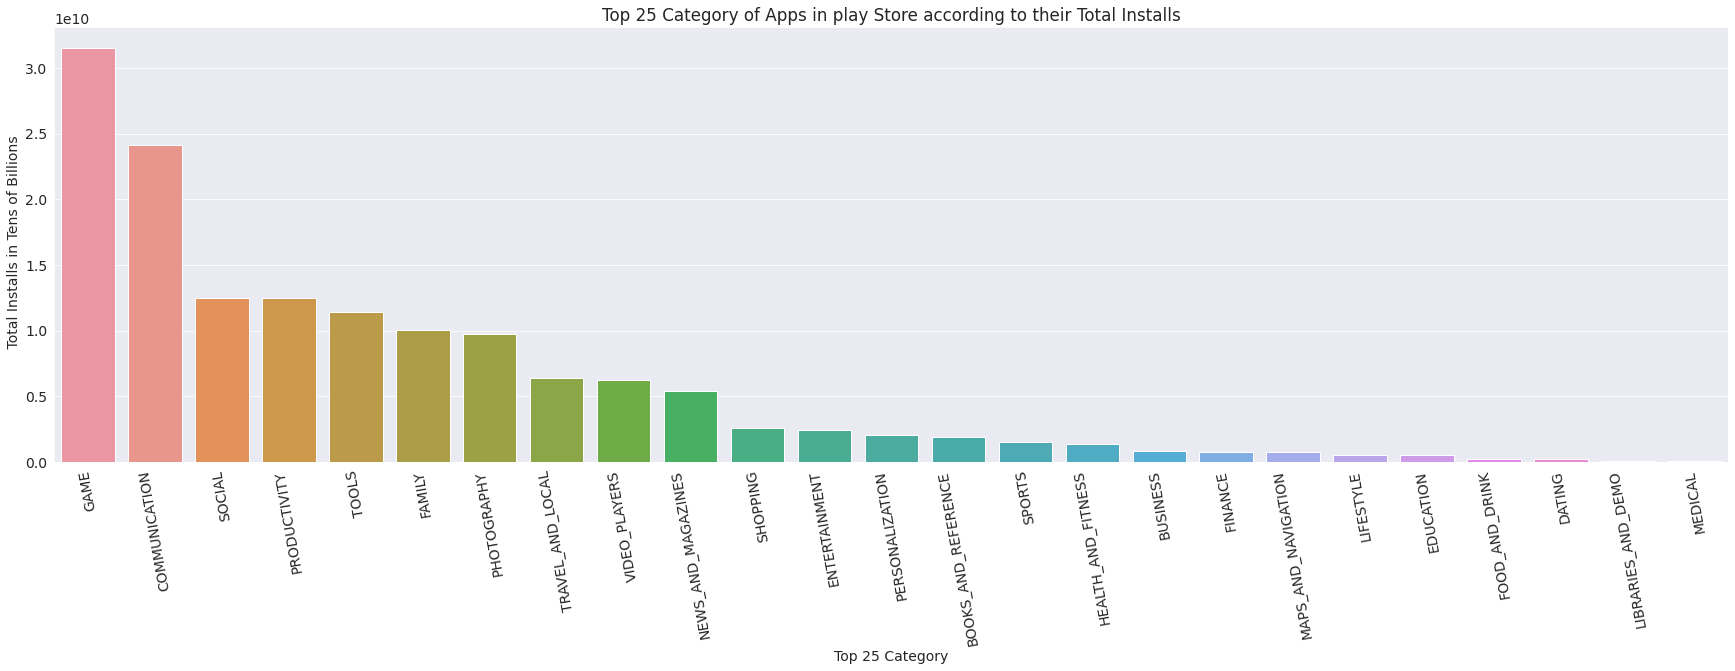

In [285]:
# plotting the graph: Top 25 Category on the basis of their total Installs
plt.figure(figsize=(30,8))
plt.xticks(rotation=100)
sns.barplot(x = highest_25_Category_accordingto_installs.Category, y = highest_25_Category_accordingto_installs.Installs)
plt.title('Top 25 Category of Apps in play Store according to their Total Installs')
plt.xlabel('Top 25 Category')
plt.ylabel(' Total Installs in Tens of Billions');

### Which Genre have the most Priced Apps ?

In [286]:
# using value_counts() to count the occurrence of individual Genre ,and storing a resultant as a dictionary
dict1 = dict(apps_df.Genres.value_counts())

# Using the dictionary above to create a new dictionary
dataframe = {'Genres':list(dict1.keys()),
             'Count':list(dict1.values())}

# Converting the dictionary above into a dataframe
top_Genre = pd.DataFrame(dataframe)
top_Genre

,Genres,Count
0,Tools,842
1,Entertainment,588
2,Education,527
3,Business,427
4,Medical,408
...,...,...
114,Health & Fitness;Action & Adventure,1
115,Strategy;Education,1
116,Music & Audio;Music & Video,1
117,Trivia;Education,1


In [287]:
# From apps_df dataframe, we will form a new dataframe that will only consist two columns: Genres and Price
top_genre_accordingto_price = apps_df[['Genres','Price']]   #.sort_values('Price', ascending = False)

# Since there are multiple apps belonging to same genres, so we will take sum of prices of all apps belonging to 1 genre, and sort the column in descending order
top_genre_accordingto_price = top_genre_accordingto_price.groupby(['Genres'])[['Price']].sum()

In [288]:
top_genre_accordingto_price.Price.sum()

10675.999999999998

In [289]:
apps_df.Price.sum()

10676.0

We have taken sum of all apps belonging to individual Genre, and added it into the new dataframe. Then we calculated the total price in the price column of the new dataframe. To verify if it is correct or not, I have also calculated the sum of Price column of the apps_df column. 

In [290]:
# Selecting the Genres in which the sum of total price of the apps belonging to that genre. 
top_genre_accordingto_price

,Price
Genres,
Action,83.26
Action;Action & Adventure,8.97
Adventure,53.88
Adventure;Action & Adventure,9.98
Adventure;Brain Games,2.99
...,...
Video Players & Editors,10.46
Video Players & Editors;Creativity,0.00
Video Players & Editors;Music & Video,0.00


In [291]:
# Merging our two dataframes
final_dataframe = top_Genre.merge(top_genre_accordingto_price, on = 'Genres', how = 'left').sort_values('Price', ascending = False).head(25)
final_dataframe

,Genres,Count,Price
10,Finance,360,2900.83
7,Lifestyle,372,2360.87
1,Entertainment,588,1665.08
4,Medical,408,1020.69
0,Tools,842,267.25
5,Productivity,407,250.93
2,Education,527,198.98
27,Role Playing,109,181.56
3,Business,427,175.29
6,Personalization,388,151.47


Text(0.5, 1.0, 'Top 25 Genres with maximum sum of price for the apps in USD')

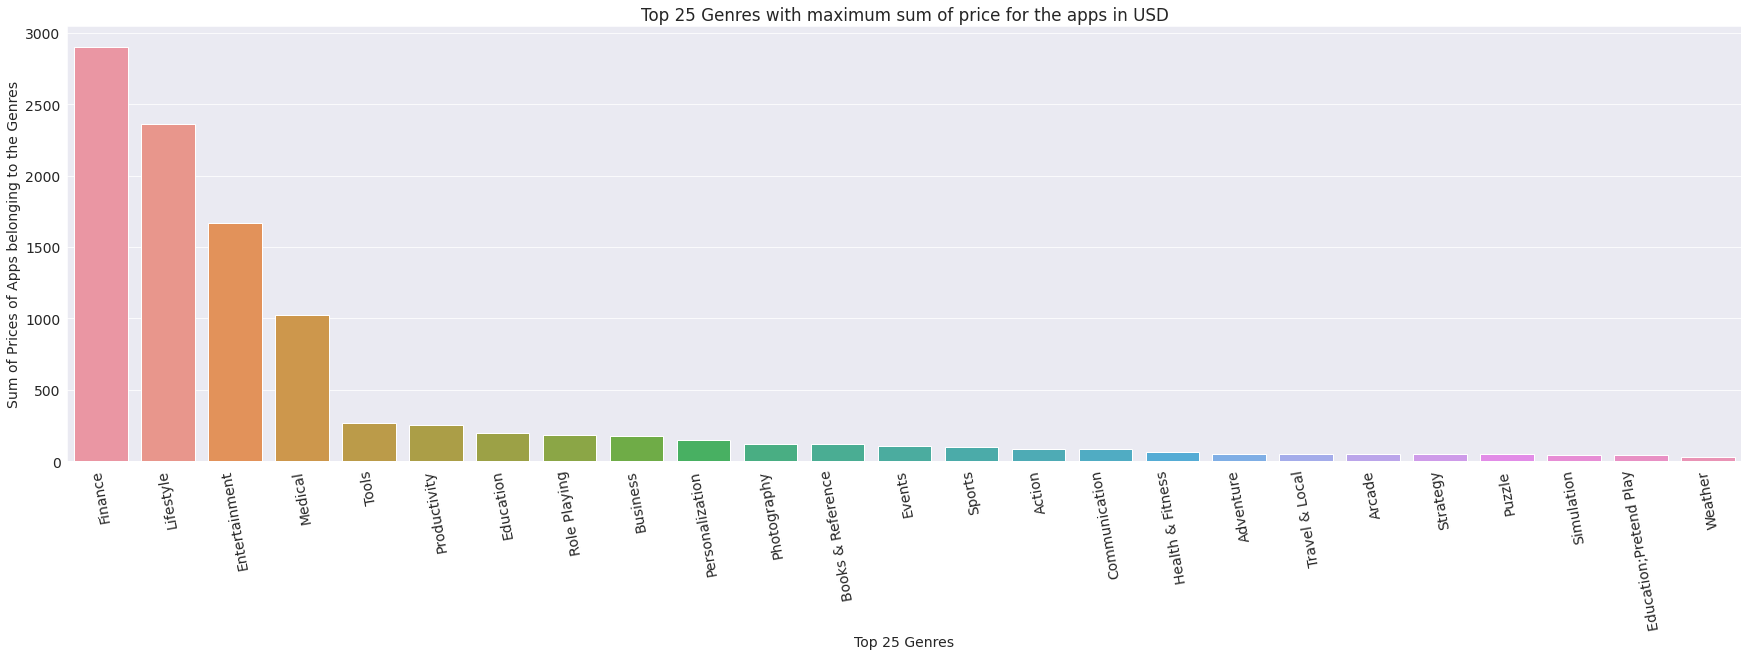

In [292]:
# plotting into the graph: Top 25 Genres with maximum sum of price for the apps

plt.figure(figsize=(30,8))
plt.xticks(rotation=100)
sns.barplot(x = final_dataframe.Genres, y = final_dataframe.Price)
plt.xlabel('Top 25 Genres')
plt.ylabel('Sum of Prices of Apps belonging to the Genres')
plt.title('Top 25 Genres with maximum sum of price for the apps in USD')

From the bar diagram above, we can conclude that the apps belonging to Finance are mostly priced with high price. Previously, we had found out that the apps belonging in Social companies like facebook,google, and microsoft were downloaded for hundreds of millions of times. However, from the bar diagram above, we can see that the apps belonging to similar Genres have least price. Therefore, we can make a conclusion that these apps or apps belonging to such genres could make most of their earning from advertising as well.

### Which Category of Apps have most priced Apps?

In [293]:
# using value_counts() to count the occurrence of individual Category ,and storing a resultant as a dictionary
dict1 = dict(apps_df.Category.value_counts())

# Using the dictionary above to create a new dictionary
dataframe = {'Category':list(dict1.keys())}

# Converting the dictionary above into a dataframe
top_Category = pd.DataFrame(dataframe)
top_Category

,Category
0,FAMILY
1,GAME
2,TOOLS
3,BUSINESS
4,MEDICAL
5,PRODUCTIVITY
6,PERSONALIZATION
7,LIFESTYLE
8,COMMUNICATION
9,FINANCE


In [294]:
# From apps_df dataframe, we will form a new dataframe that will only consist two columns: Category and Price
top_Category_accordingto_price = apps_df[['Category','Price']]   

# Since there are multiple apps belonging to same Category, so we will take sum of prices of all apps belonging to 1 genre, and sort the column in descending order
top_Category_accordingto_price = top_Category_accordingto_price.groupby(['Category'])[['Price']].sum()

In [295]:
# Merging our two dataframes
final_dataframe = top_Category.merge(top_Category_accordingto_price, on = 'Category', how = 'left').sort_values('Price', ascending = False).head(25)
final_dataframe

,Category,Price
9,FINANCE,2900.83
0,FAMILY,2420.82
7,LIFESTYLE,2360.87
4,MEDICAL,1020.69
1,GAME,287.30
2,TOOLS,267.25
5,PRODUCTIVITY,250.93
3,BUSINESS,175.29
6,PERSONALIZATION,151.47
11,PHOTOGRAPHY,122.23


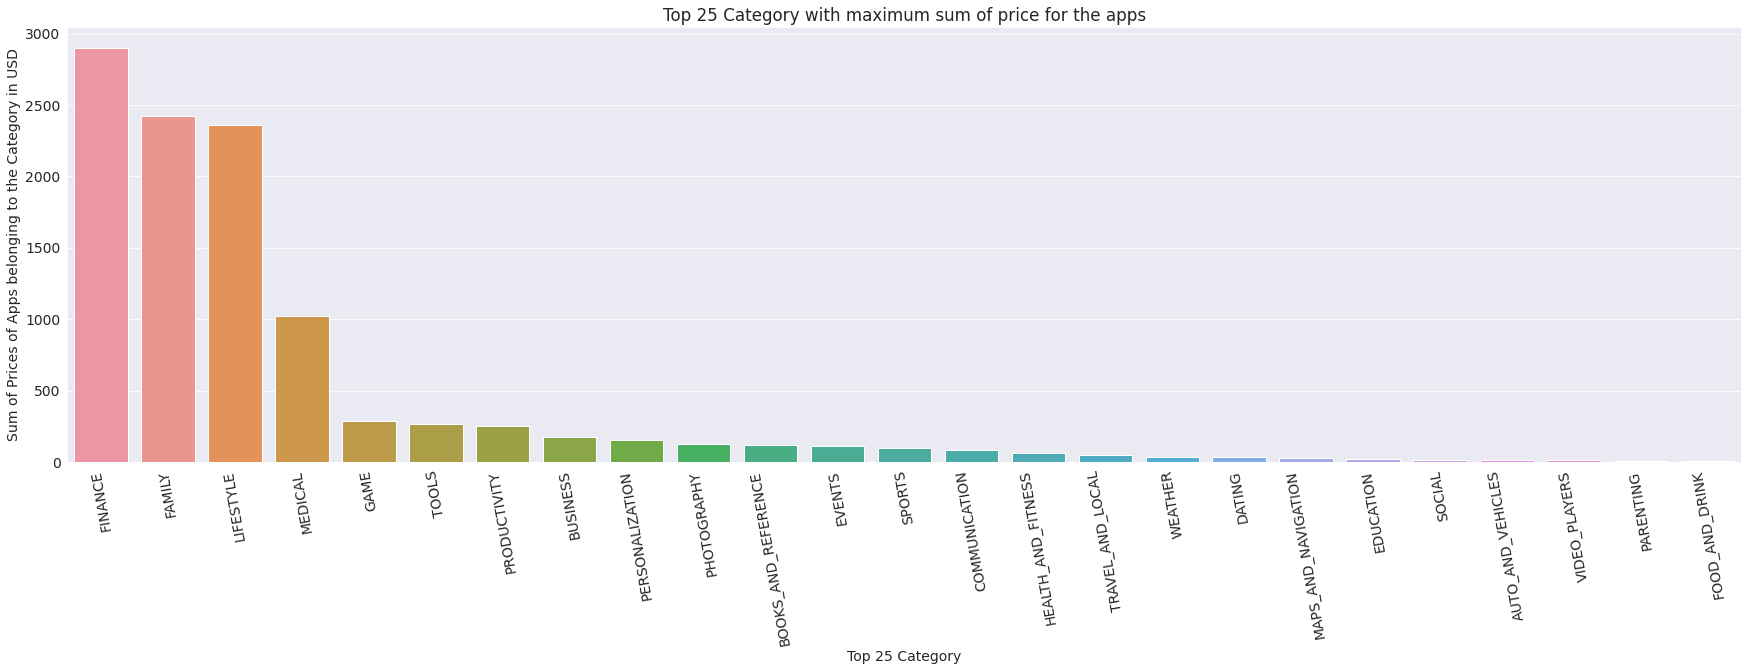

In [296]:
# plotting into the graph: Top 25 Category with maximum sum of price for the apps

plt.figure(figsize=(30,8))
plt.xticks(rotation=100)
sns.barplot(x = final_dataframe.Category, y = final_dataframe.Price)
plt.xlabel('Top 25 Category')
plt.ylabel('Sum of Prices of Apps belonging to the Category in USD')
plt.title('Top 25 Category with maximum sum of price for the apps');

### Which Genres have the most and Least ratings Ratings?

In [297]:
# creating a new dataframe consisting of Genres, and their average mean
mean_ratings_accto_genres = apps_df.groupby(['Genres'])[['Rating']].mean().sort_values('Rating',ascending = False)

cols = list(apps_df.Genres.unique())

dict2 = {
    'Genres':cols
}

df = pd.DataFrame(dict2)

mean_ratings_accto_genres = mean_ratings_accto_genres.merge(df, on = 'Genres',how = 'left')
mean_ratings_accto_genres

,Genres,Rating
0,Board;Pretend Play,4.800000
1,Comics;Creativity,4.800000
2,Health & Fitness;Education,4.700000
3,Strategy;Action & Adventure,4.600000
4,Puzzle;Education,4.600000
...,...,...
114,Parenting;Education,3.718070
115,Art & Design;Action & Adventure,3.606622
116,Trivia;Education,3.606622
117,Role Playing;Education,3.606622


In [298]:
# top 10 Genres with highest ratings
highest_Ratings_top_10 = mean_ratings_accto_genres.head(10)
highest_Ratings_top_10

,Genres,Rating
0,Board;Pretend Play,4.800000
1,Comics;Creativity,4.800000
2,Health & Fitness;Education,4.700000
3,Strategy;Action & Adventure,4.600000
4,Puzzle;Education,4.600000
5,Adventure;Brain Games,4.600000
6,Entertainment;Creativity,4.533333
7,Music;Music & Video,4.533333
8,Strategy;Education,4.500000
9,Arcade;Pretend Play,4.500000


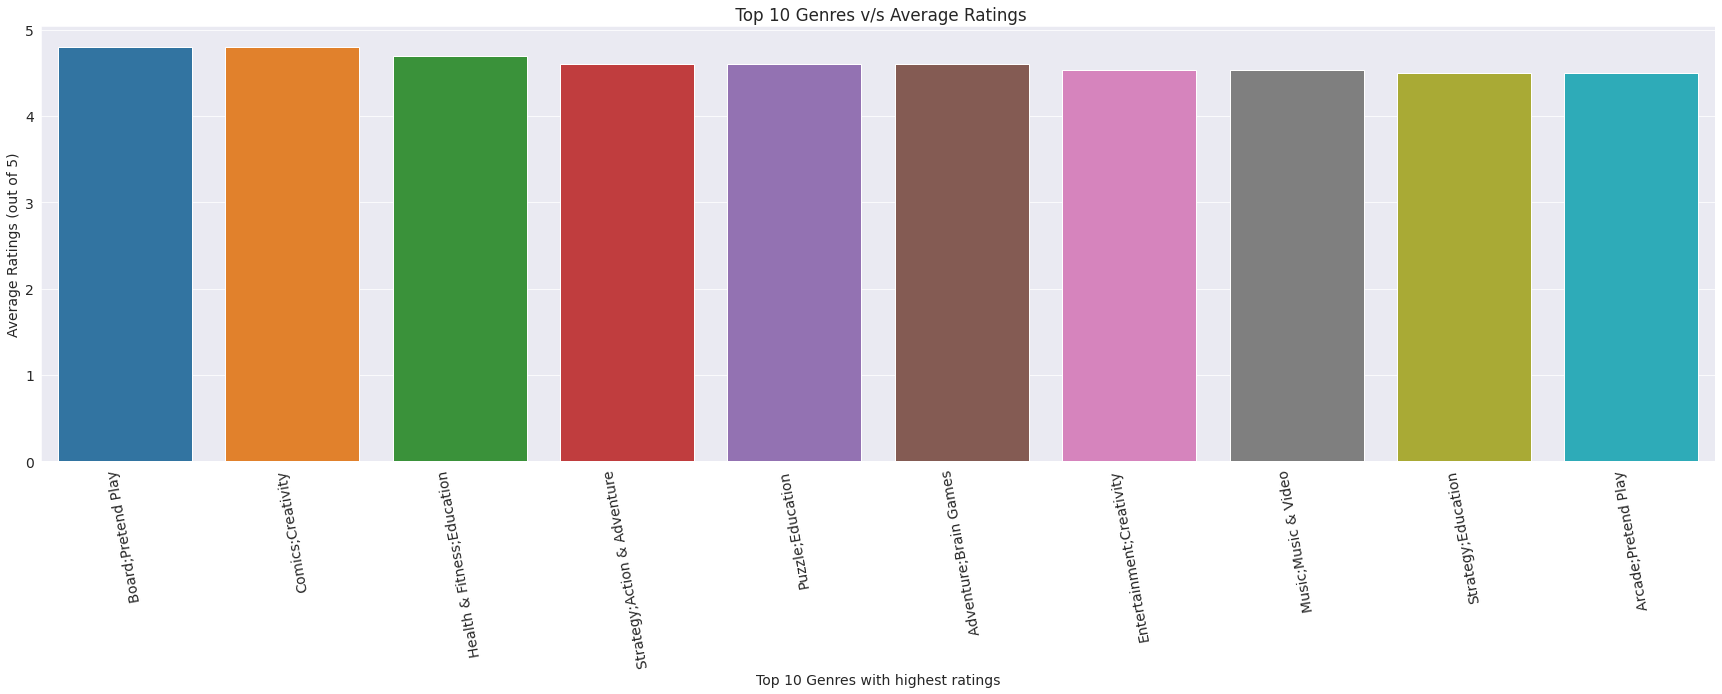

In [299]:
# plotting the Genres vs average Ratings
plt.figure(figsize=(30,8))
plt.xticks(rotation=100)
sns.barplot(x = highest_Ratings_top_10.Genres, y = highest_Ratings_top_10.Rating)
plt.xlabel('Top 10 Genres with highest ratings')
plt.ylabel('Average Ratings (out of 5)')
plt.title(' Top 10 Genres v/s Average Ratings');

We can clearly see that `Board;Pretend Play` genre has the highest average ratings in the entire dataset. Thus, we can also conclude that the apps belonging to this genre are most loved as well.

In [300]:
# top 10 genres with lowest ratings 
lowest_Ratings_top_10 = mean_ratings_accto_genres.tail(10)
lowest_Ratings_top_10

,Genres,Rating
109,Dating,3.902781
110,Art & Design;Pretend Play,3.900000
111,Health & Fitness;Action & Adventure,3.900000
112,Educational,3.836030
113,Parenting;Brain Games,3.800000
114,Parenting;Education,3.718070
115,Art & Design;Action & Adventure,3.606622
116,Trivia;Education,3.606622
117,Role Playing;Education,3.606622
118,Books & Reference;Creativity,3.606622


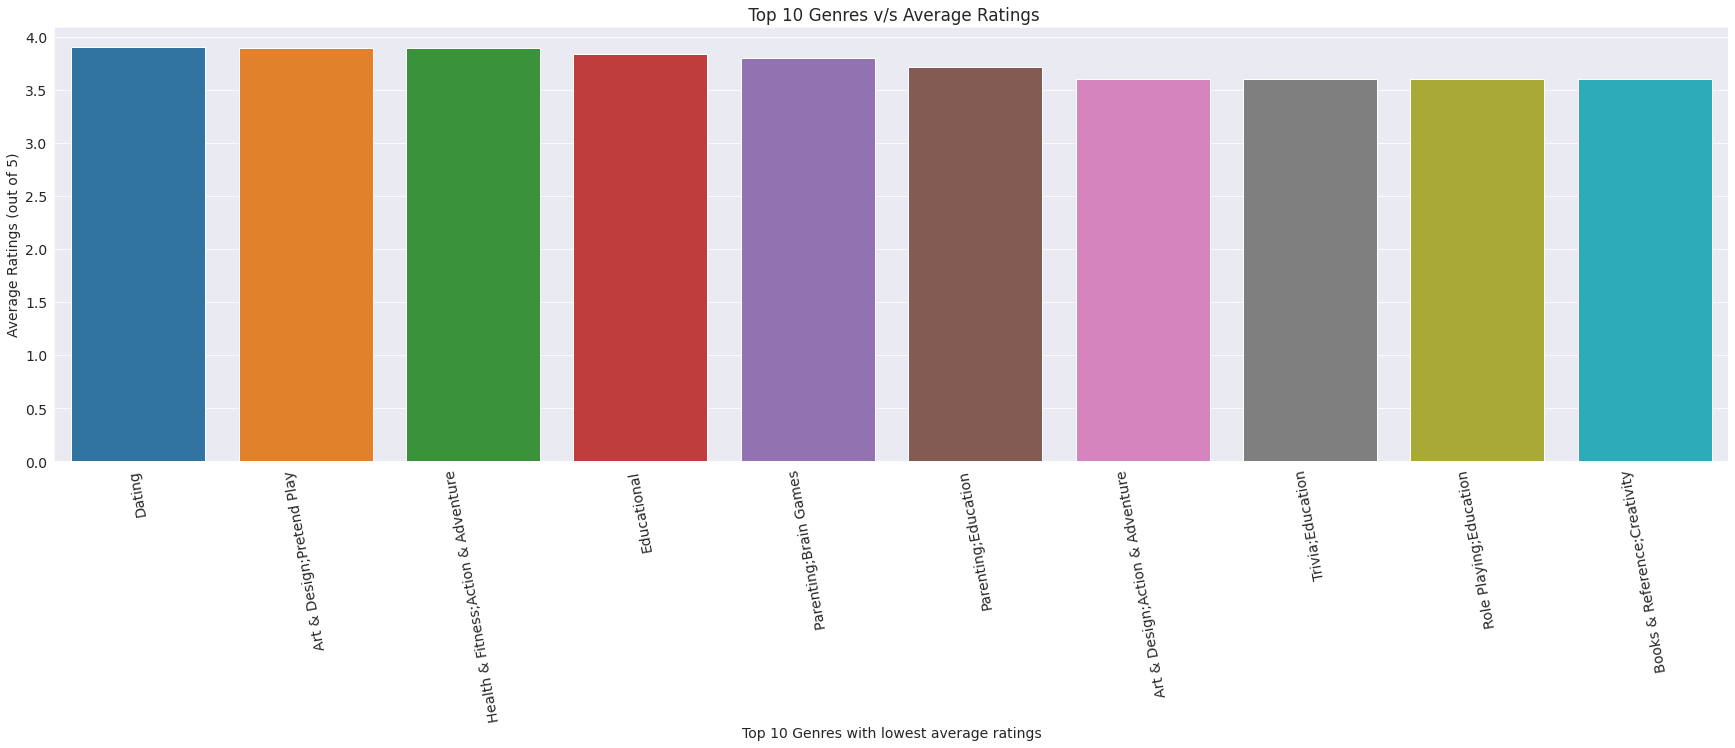

In [301]:
# plotting the Genres vs average Ratings
plt.figure(figsize=(30,8))
plt.xticks(rotation=100)
sns.barplot(x = lowest_Ratings_top_10.Genres, y = lowest_Ratings_top_10.Rating)
plt.xlabel('Top 10 Genres with lowest average ratings')
plt.ylabel('Average Ratings (out of 5)')
plt.title(' Top 10 Genres v/s Average Ratings');

We can clearly see that apps belonging to the `Books & Reference;Creativity` genre are  least rated . Perhaps maybe they are paid apps because paid apps are expected to offer more to the user than free apps.

### Which Category have highest and least ratings?

In [302]:
# creating a new dataframe consisting of Category, and their average mean
mean_ratings_accto_Category = apps_df.groupby(['Category'])[['Rating']].mean().sort_values('Rating',ascending = False)

cols = list(apps_df.Category.unique())

dict3 = {
    'Category':cols
}

df1 = pd.DataFrame(dict3)

mean_ratings_accto_Category = mean_ratings_accto_Category.merge(df1, on = 'Category',how = 'left')
mean_ratings_accto_Category

,Category,Rating
0,EDUCATION,4.370051
1,ART_AND_DESIGN,4.323383
2,GAME,4.252998
3,WEATHER,4.189590
4,EVENTS,4.189466
5,SHOPPING,4.188150
6,PERSONALIZATION,4.187672
7,PARENTING,4.184437
8,BOOKS_AND_REFERENCE,4.176743
9,SOCIAL,4.171566


In [303]:
# top 10 Category with highest ratings
highest_Ratings_top_10_Category = mean_ratings_accto_Category.head(10)
highest_Ratings_top_10_Category

,Category,Rating
0,EDUCATION,4.370051
1,ART_AND_DESIGN,4.323383
2,GAME,4.252998
3,WEATHER,4.189590
4,EVENTS,4.189466
5,SHOPPING,4.188150
6,PERSONALIZATION,4.187672
7,PARENTING,4.184437
8,BOOKS_AND_REFERENCE,4.176743
9,SOCIAL,4.171566


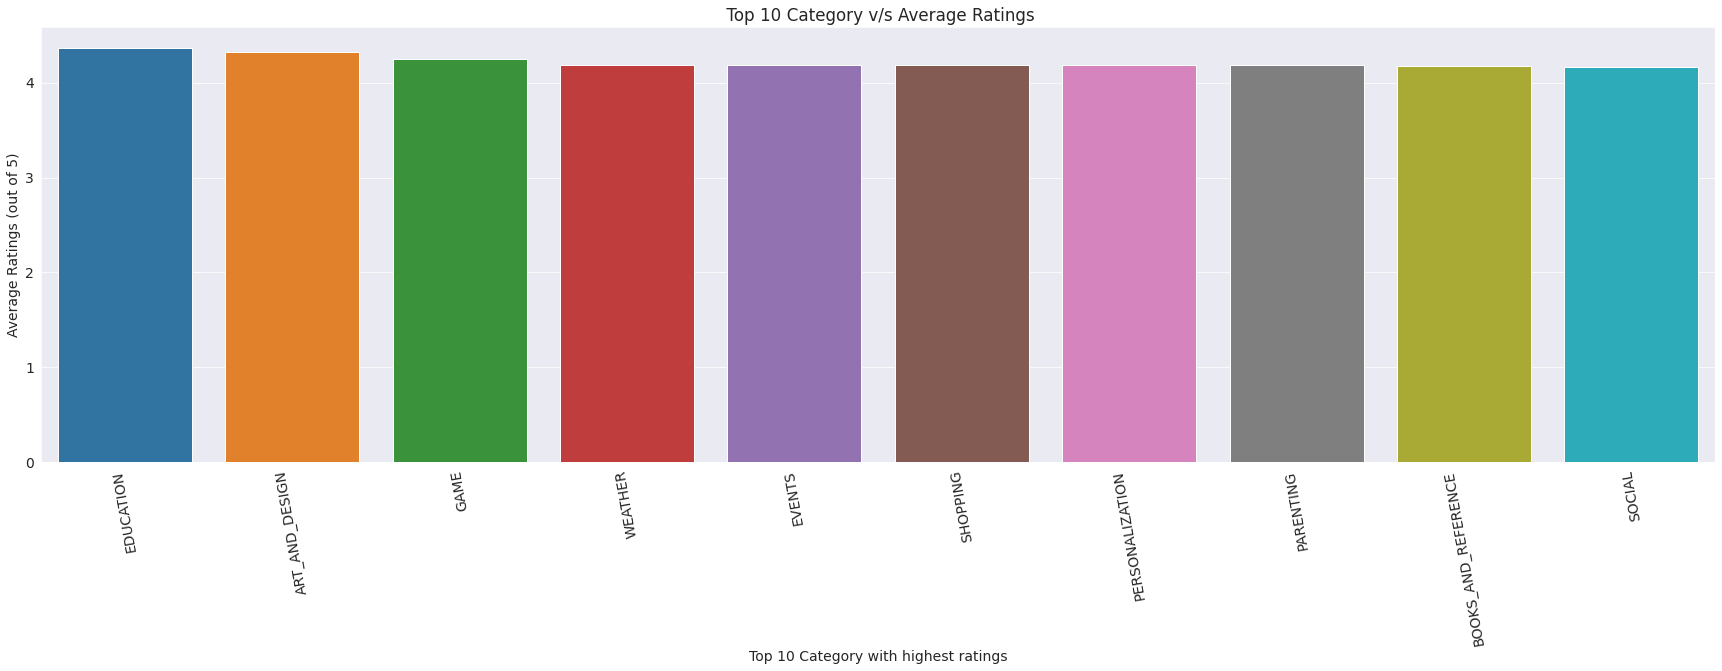

In [304]:
# plotting the Category vs average Ratings
plt.figure(figsize=(30,8))
plt.xticks(rotation=100)
sns.barplot(x = highest_Ratings_top_10_Category.Category, y = highest_Ratings_top_10_Category.Rating)
plt.xlabel('Top 10 Category with highest ratings')
plt.ylabel('Average Ratings (out of 5)')
plt.title(' Top 10 Category v/s Average Ratings');

In [305]:
# top 10 Category with lowest ratings
lowest_Ratings_top_10_Category = mean_ratings_accto_Category.tail(10)
lowest_Ratings_top_10_Category

,Category,Rating
23,LIBRARIES_AND_DEMO,4.043911
24,MEDICAL,4.032848
25,NEWS_AND_MAGAZINES,4.029663
26,TRAVEL_AND_LOCAL,4.028320
27,VIDEO_PLAYERS,4.024568
28,MAPS_AND_NAVIGATION,4.009388
29,LIFESTYLE,4.006837
30,TOOLS,3.990417
31,BUSINESS,3.920234
32,DATING,3.902781


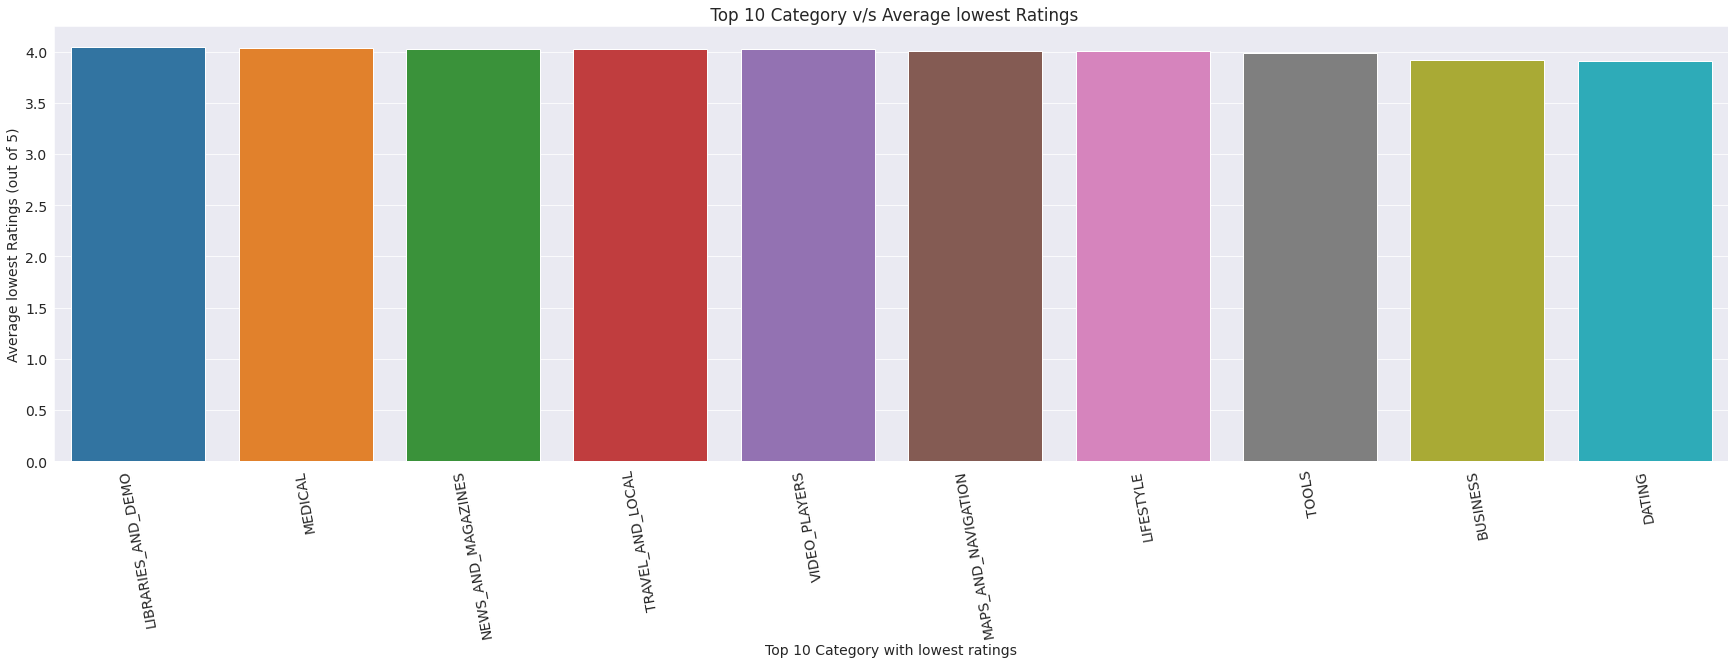

In [306]:
# plotting the Category vs average lowest Ratings
plt.figure(figsize=(30,8))
plt.xticks(rotation=100)
sns.barplot(x = lowest_Ratings_top_10_Category.Category, y = lowest_Ratings_top_10_Category.Rating)
plt.xlabel('Top 10 Category with lowest ratings')
plt.ylabel('Average lowest Ratings (out of 5)')
plt.title(' Top 10 Category v/s Average lowest Ratings');

### What is the distribution of ratings?

In [307]:
ratings_df = apps_df[['Rating']]
ratings_df

,Rating
0,4.100000
1,3.900000
2,4.700000
3,4.500000
4,4.300000
...,...
10836,4.500000
10837,5.000000
10838,3.606622
10839,4.500000


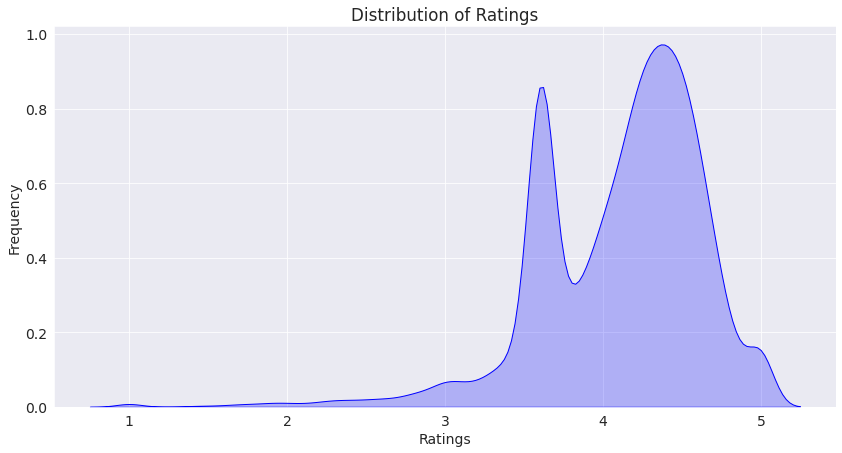

In [308]:
plt.figure(figsize=(14,7))
sns.kdeplot(x = ratings_df.Rating,color = 'blue',shade = True)
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.title('Distribution of Ratings');

Here, the kdeplot of seaborn library is used to visualizaing the probability density of the ratings ranging from 1 to 5. Thus, after visualizing the ratings that we cleaned by replacing `NAn` values, we can conclude that the majotity of ratings were valued in between 4 to 5. There were very few ratings that were rated less than 3.

### What are the number apps in different categories with respect to their type(Free/paid) ?

In [309]:
# creating a dataframe consisting different category ,and their app's types (Paid/Free)
x = apps_df.groupby(['Category','Type'])[['App']].count().reset_index()

# Creating a new dataframe that only consists of Catogeries that have Free apps and their count
x1 = x[x['Type'] == 'Free'].rename(columns={'App':'Free'}).drop('Type',axis = 1)

# Creating a new dataframe that only consists of Catogeries that have Paid apps and their count
x2 = x[x['Type'] == 'Paid'].rename(columns={'App':'Paid'}).drop(columns=['Type'])

Here, reset_index() converts the dataframe object into a pure dataframe by adding the index label column. We previously did this by creating a dictionary containing columns, converting the dictionary into a dataframe, and merging the two dataframes.

In [310]:
# Merging the two dataframes and creating a new dataframe that consists of two new columns from the Type column: Free and Paid
total_apps_count_accto_category_df = x1.merge(x2,on = 'Category',how = 'left').fillna(0)

<b>The equivalent steps for the above two cells</b>

free_apps_count_df = apps_df.groupby(['Category','Type'])[['App']].count().reset_index().rename(columns={'App':'Count'})


free_apps_count_df = free_apps_count_df.pivot('Category','Type','Count').fillna(0).reset_index().rename(columns={'Type':''})

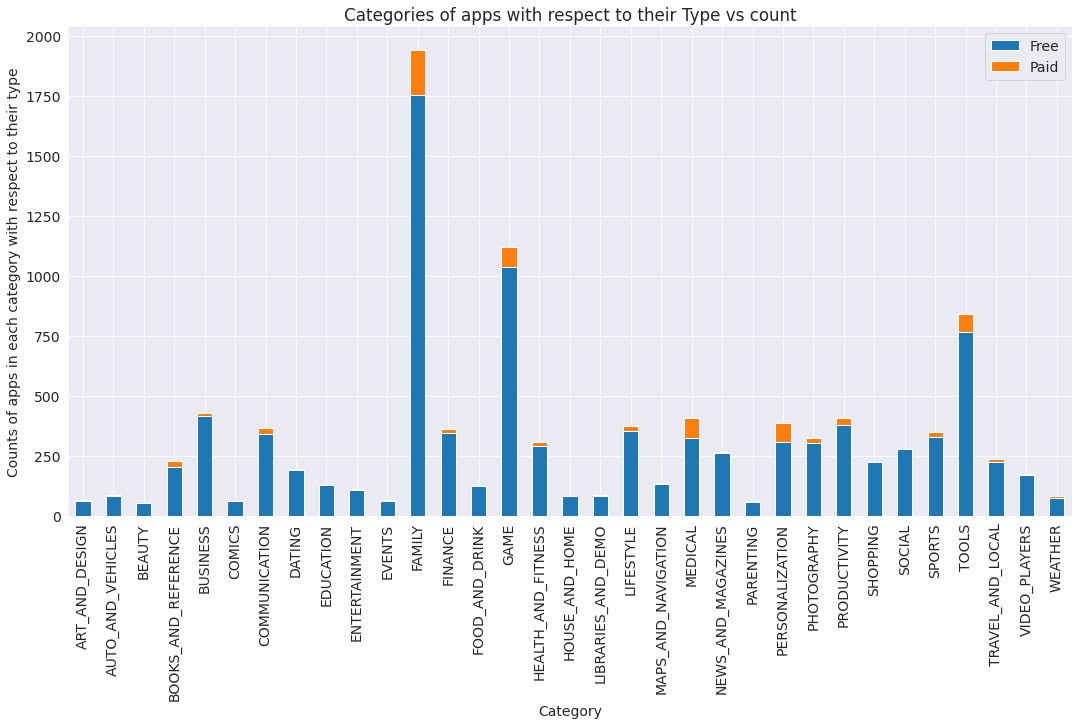

In [311]:
total_apps_count_accto_category_df.set_index('Category').plot(kind='bar', stacked=True, figsize=(18,9))
plt.xlabel("Category")
plt.ylabel('Counts of apps in each category with respect to their type')
plt.title("Categories of apps with respect to their Type vs count");

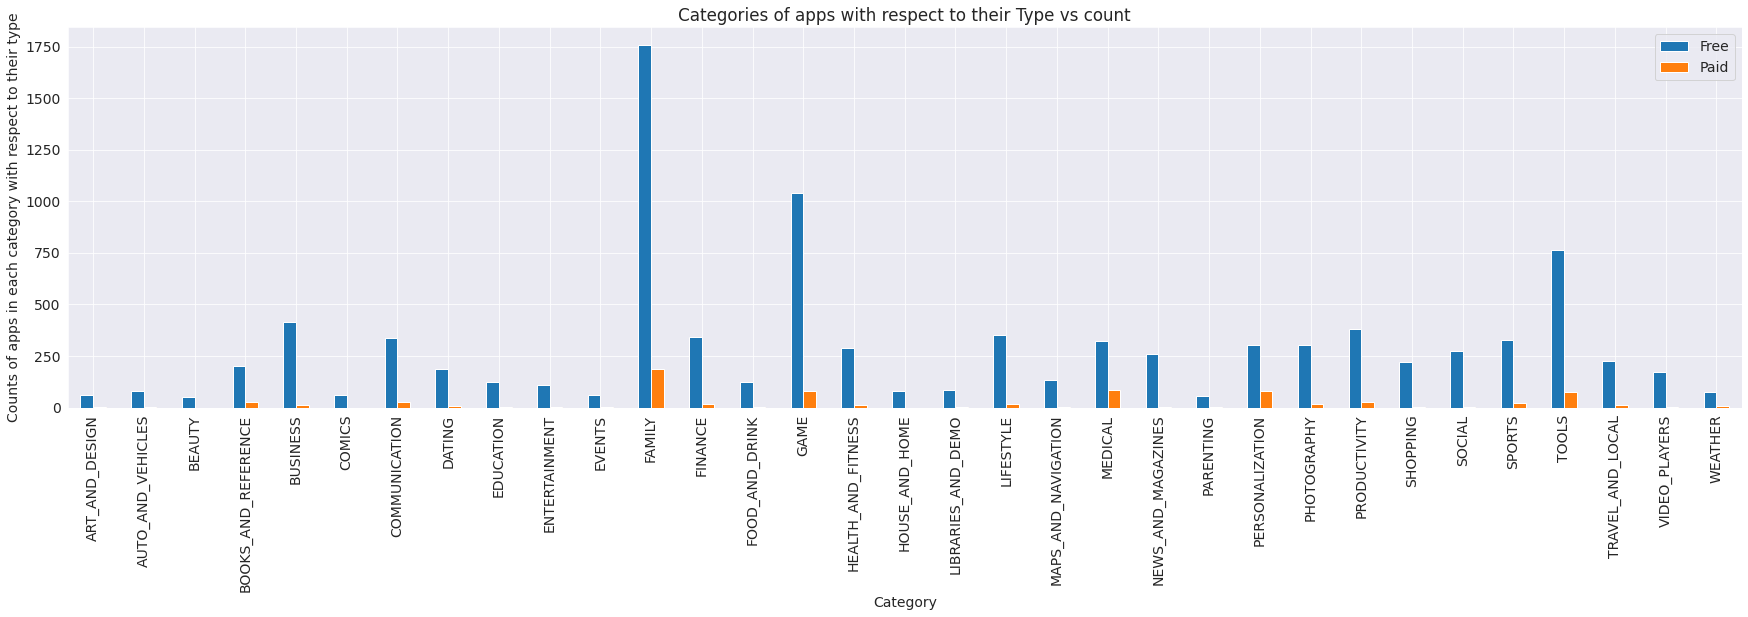

In [312]:
# equivalent to bar diagram above, only difference being stacked = False
total_apps_count_accto_category_df.set_index('Category').plot(kind = 'bar', stacked = False, figsize = (30,7));
plt.xlabel("Category")
plt.ylabel('Counts of apps in each category with respect to their type')
plt.title("Categories of apps with respect to their Type vs count");

We can clearly see that apps belonging to Family category had most free apps as well as Paid apps. Similarly, we can also make a conclusion that all Categories have very few paid apps as compared to free apps. 

### What are the number apps in different Genres with respect to their type(Free/paid) ?

In [313]:
# creating a dataframe consisting different Genres ,and their app's types (Paid/Free)
y = apps_df.groupby(['Genres','Type'])[['App']].count().reset_index()

# Creating a new dataframe that only consists of Genres that have Free apps and their count
y1 = y[y['Type'] == 'Free'].rename(columns={'App':'Free'}).drop('Type',axis = 1)

# Creating a new dataframe that only consists of Genres that have Paid apps and their count
y2 = y[y['Type'] == 'Paid'].rename(columns={'App':'Paid'}).drop(columns=['Type'])

In [314]:
# Merging the two dataframes and creating a new dataframe that consists of two new columns from the Type column: Free and Paid
total_apps_count_acc_genre_df = y1.merge(y2,on = 'Genres',how = 'left').fillna(0)

# dataframe containing count of apps that are free belonging to different Genres
free = total_apps_count_acc_genre_df[['Genres','Free']].sort_values('Free',ascending = False)

# dataframe containing count of apps that are paid belonging to different Genres
paid = total_apps_count_acc_genre_df[['Genres','Paid']].sort_values('Paid',ascending = False)

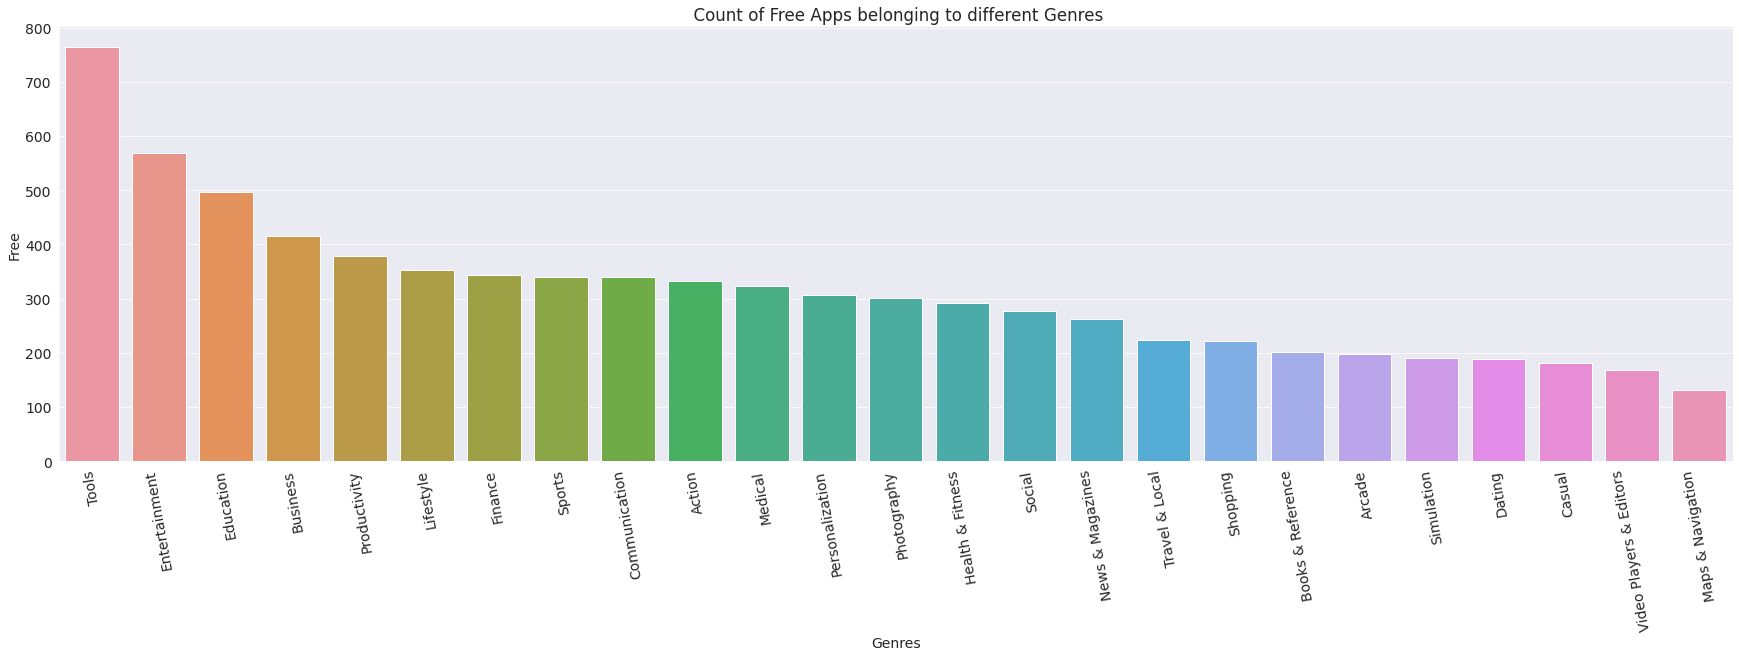

In [315]:
# plotting in the graph
plt.figure(figsize=(30,8))
plt.xticks(rotation=100)
sns.barplot(data = free.head(25), x = 'Genres', y = 'Free')
plt.title(' Count of Free Apps belonging to different Genres');

We can clearly see that the there were more than 750 apps that were free and belonged to `Tools` genre.

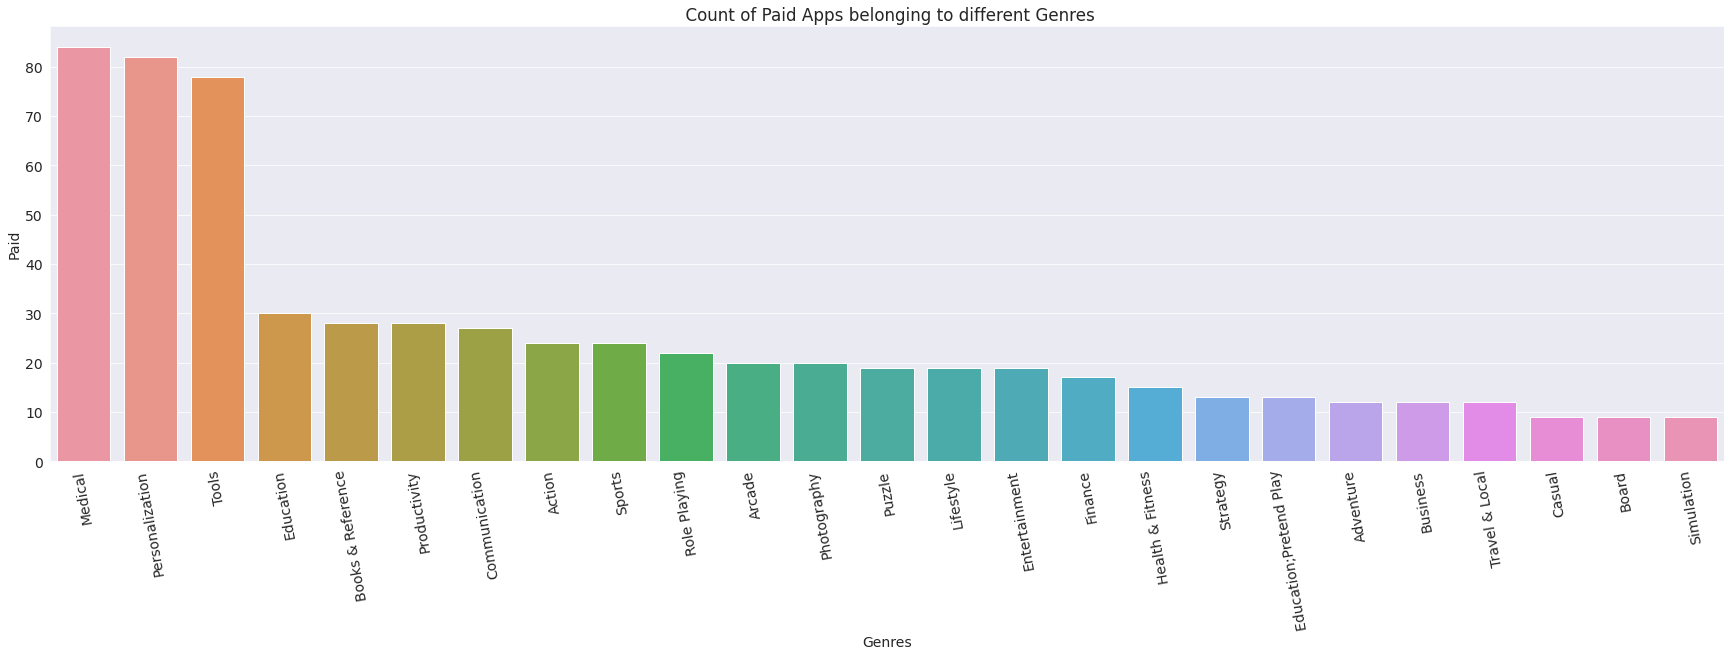

In [316]:
# plotting in the graph
plt.figure(figsize=(30,8))
plt.xticks(rotation=100)
sns.barplot(data = paid.head(25), x = 'Genres', y = 'Paid')
plt.title(' Count of Paid Apps belonging to different Genres');

We can clearly see that there were more than 80 apps that were of paid type, and belonged to `Medical` genre.

### How many apps with respect to their type were most installed?

In [317]:
total_installs_accto_type_category = apps_df.groupby(['Category','Type'])[['Installs']].sum().reset_index()

In [318]:
## using np.log10() function to calculate the logarithm of values in Installs column
total_installs_accto_type_category['log_installs'] = np.log10(total_installs_accto_type_category.Installs)

Here, the installs values for paid and unpaid was very different. Free apps had way way more installations as compared to paid apps. Some free apps had installations in billions, and some paid apps has in thousands. Hence, to get proper idea and plotting the bar diagram, We have cacluated the logarithm of values of `Installs` column respectively.

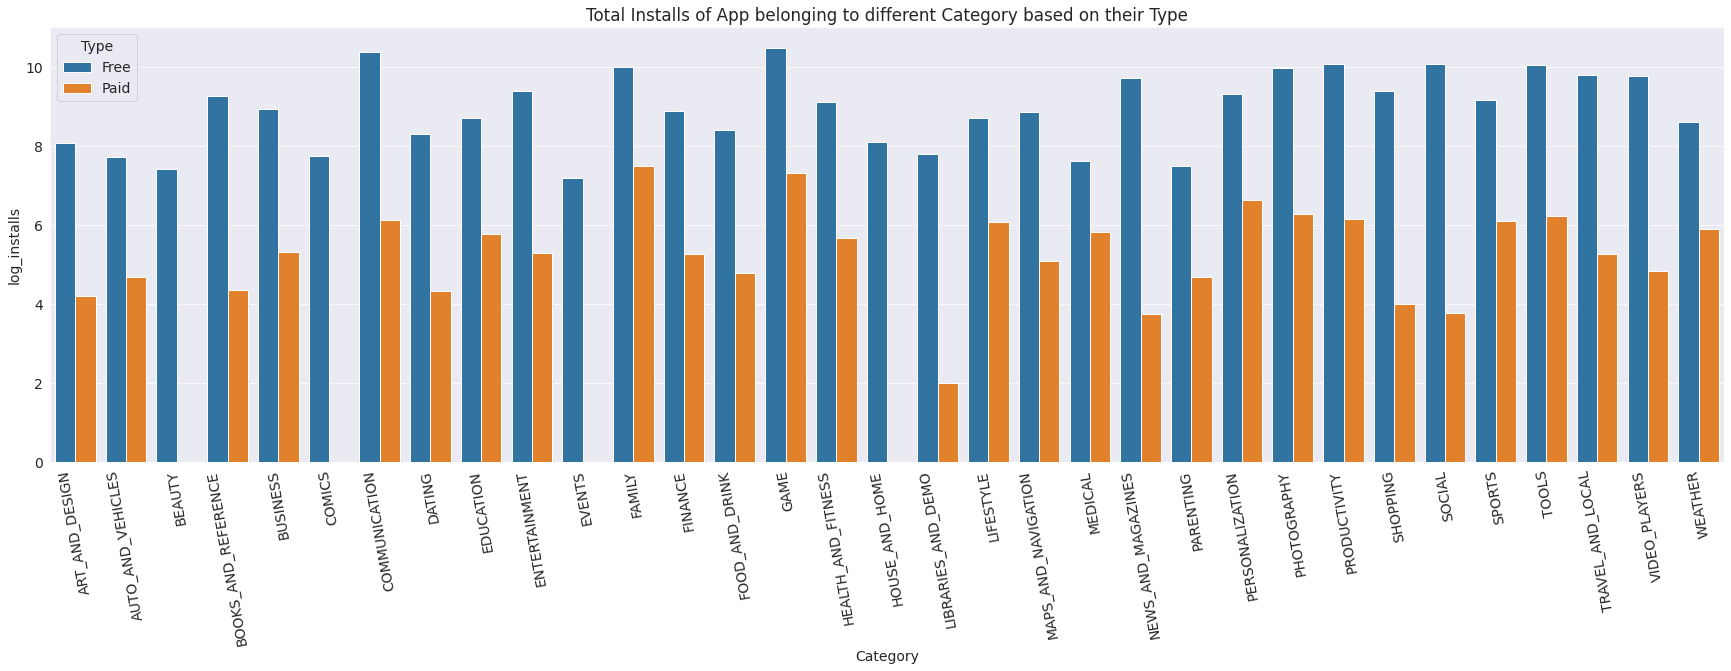

In [319]:
# plotting in the graph
plt.figure(figsize=(30,8))
plt.xticks(rotation=100)
plt.xlabel('Category')
plt.ylabel('Installs in Billions')
sns.barplot(data= total_installs_accto_type_category, x= 'Category', y= 'log_installs',hue='Type')
plt.title('Total Installs of App belonging to different Category based on their Type');

We can make a conclusion that the number of apps installed that were Free is significantly higher as compared to apps installed that were paid.

### How does App's size affect the number of installations?

In [320]:
apps_df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



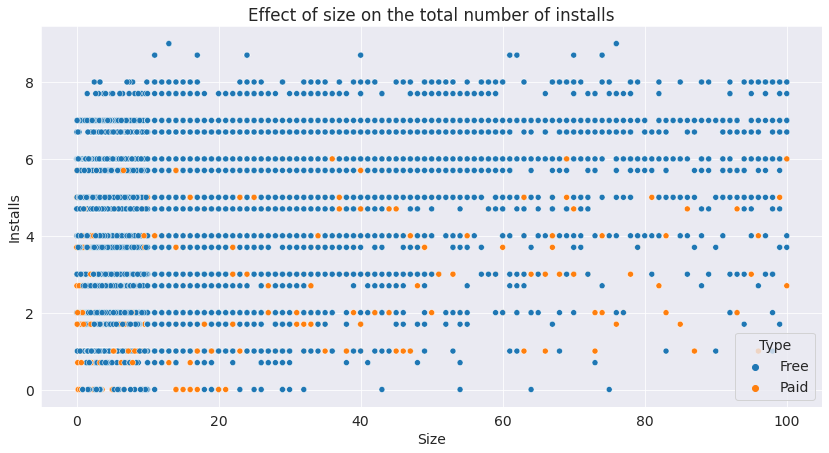

In [321]:
# plotting the scatterplot
plt.figure(figsize=(14,7))
plt.title('Effect of size on the total number of installs')
sns.scatterplot(x = apps_df.Size, y = np.log10(apps_df.Installs), hue = apps_df.Type)
plt.show();

From the scatterplot above, we can conclude that the size of app directly affects its installation. Apps that are huge in size are less likely to be downloaded as compared to apps with less size. This case applies for both paid and free apps.

### Visualizing the distribution of Size of Apps

In [322]:
apps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",0.1.8,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",0.1.8,4.4 and up


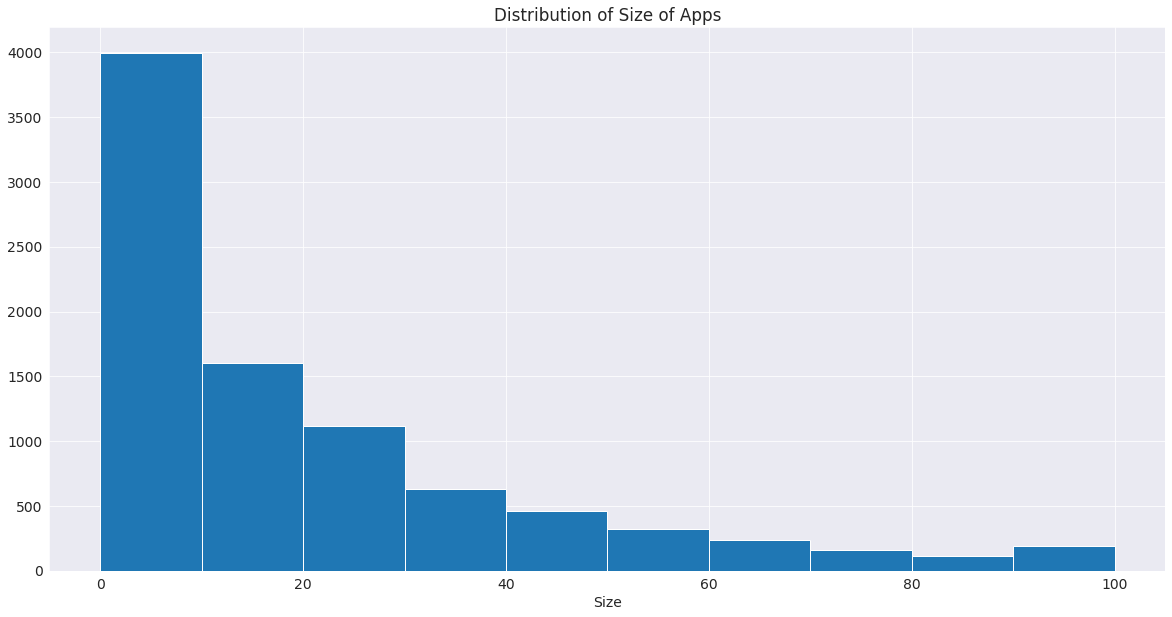

In [323]:
# plotting the histogram
plt.title('Distribution of Size of Apps')
plt.xlabel('Size')
plt.hist(apps_df.Size);

In [324]:
apps_df.Size[apps_df.Size <= 10].size

3995

We can clearly see that, in the histogram above, there are almost 4000 apps that have app size between 0 to 10 `MB`.

In [325]:
apps_df.Size[(apps_df.Size > 10) & (apps_df.Size <= 20)].size

1604

As shown by the cell and histogram above, we can clearly see that there are more than 1600 apps that are sized in between 10 to 20 `MB`.

In [326]:
apps_df.Size[(apps_df.Size > 90) & (apps_df.Size <= 100)].size

195

From the histogram above, we can clearly see that there are almost `200` apps that have app size between 90 to 100 `MB`.

### Visualizing the distribution of Reviews from the merged dataframe

In [327]:
apps_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",0.1.8,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",0.1.8,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.500000,38,53.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,3.6,100,Free,0.0,Everyone,Education,"July 6, 2018",0.1.8,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,3.606622,3,9.5,1000,Free,0.0,Everyone,Medical,"January 20, 2017",0.1.8,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.500000,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",0.1.8,Varies with device


In [328]:
reviews_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,not given,not given,not given,not given
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.4,0.875
4,10 Best Foods for You,Best idea us,Positive,1,0.3
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,not given,not given,not given,not given
64291,Houzz Interior Design Ideas,not given,not given,not given,not given
64292,Houzz Interior Design Ideas,not given,not given,not given,not given
64293,Houzz Interior Design Ideas,not given,not given,not given,not given


Lets merge the above two dataframes.

In [329]:
merged_df = apps_df.merge(reviews_df, on = 'App')

In [330]:
sentiments_df = merged_df.groupby(['Category','Sentiment']).size().reset_index().rename(columns={0:'Sentiment Count'})

Lets create a list containing the indexes of rows where Sentiment column has value `not given`.

In [331]:
indexes_with_SentimentColumnhas_notgiven = sentiments_df.loc[sentiments_df.Sentiment == 'not given'].index.to_list()

In [332]:
# removing the rows from our sentiment_df dataframe where column Sentiment == 'not given'

sentiments_df.drop(axis = 0, inplace = True, labels = indexes_with_SentimentColumnhas_notgiven)

Here, axis = 0 means rows and axis = 1 means columns

inplace = True means making change in our original dataframe

labels means what to drop. In this case, list containing indexes of rows to be dropped.

In [333]:
sentiments_df

,Category,Sentiment,Sentiment Count
0,ART_AND_DESIGN,Negative,61
1,ART_AND_DESIGN,Neutral,62
2,ART_AND_DESIGN,Positive,259
4,AUTO_AND_VEHICLES,Negative,17
5,AUTO_AND_VEHICLES,Neutral,36
...,...,...,...
125,VIDEO_PLAYERS,Neutral,58
126,VIDEO_PLAYERS,Positive,190
128,WEATHER,Negative,33
129,WEATHER,Neutral,35


In [334]:
sentiments_df['log_sentiment_count'] = np.log10(sentiments_df['Sentiment Count'])

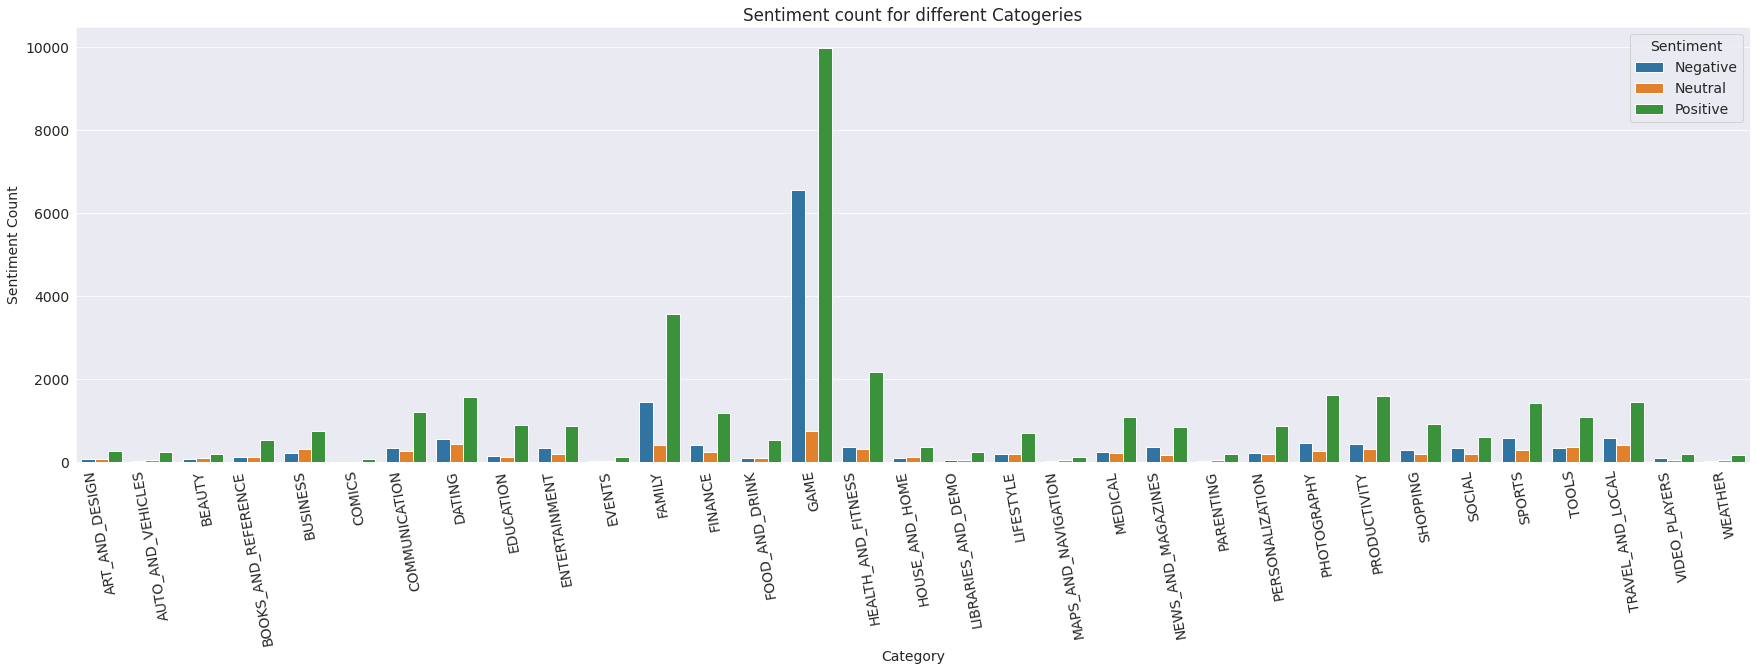

In [335]:
plt.figure(figsize=(30,8))
plt.xticks(rotation=100)
plt.title('Sentiment count for different Catogeries')
sns.barplot(x = 'Category', y = 'Sentiment Count', hue = 'Sentiment', data = sentiments_df);

We can clearly see that the majority of reviews are for apps belonging to `GAME` category. In the `Game` category, there are twice as many positive reviews than the negative reviews.

### Visualizing the distribution of Sentiment Subjectivity

In [340]:
merged_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.25,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,not given,not given,not given,NaN
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.5,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100214,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,NaN,10000000,Free,0.0,Everyone,Photography,"August 6, 2018",0.1.8,Varies with device,not given,not given,not given,NaN
100215,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,NaN,10000000,Free,0.0,Everyone,Photography,"August 6, 2018",0.1.8,Varies with device,not given,not given,not given,NaN
100216,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,NaN,10000000,Free,0.0,Everyone,Photography,"August 6, 2018",0.1.8,Varies with device,Too much ads,Positive,0.2,0.200000
100217,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,NaN,10000000,Free,0.0,Everyone,Photography,"August 6, 2018",0.1.8,Varies with device,Just allow time ...,Neutral,0,0.000000


In [337]:
# converting the 'not given' values from Sentiment Polarity column back to nan for ease 
merged_df.Sentiment_Subjectivity.replace(inplace = True, to_replace='not given', value = np.nan)

In [338]:
merged_df.describe()

,Rating,Reviews,Size,Installs,Price,Sentiment_Subjectivity
count,100219.000000,1.002190e+05,64248.000000,1.002190e+05,100219.000000,59171.000000
mean,4.333860,2.428315e+06,35.732615,7.886330e+07,0.096968,0.495885
std,0.278944,6.540518e+06,27.921784,1.981247e+08,1.323035,0.238795
min,2.500000,1.000000e+01,0.008000,1.000000e+03,0.000000,0.000000
25%,4.200000,2.743900e+04,11.000000,1.000000e+06,0.000000,0.382741
50%,4.400000,1.972950e+05,28.000000,1.000000e+07,0.000000,0.510000
75%,4.500000,1.574546e+06,54.000000,1.000000e+08,0.000000,0.633333
max,4.900000,7.815831e+07,99.000000,1.000000e+09,33.990000,1.000000


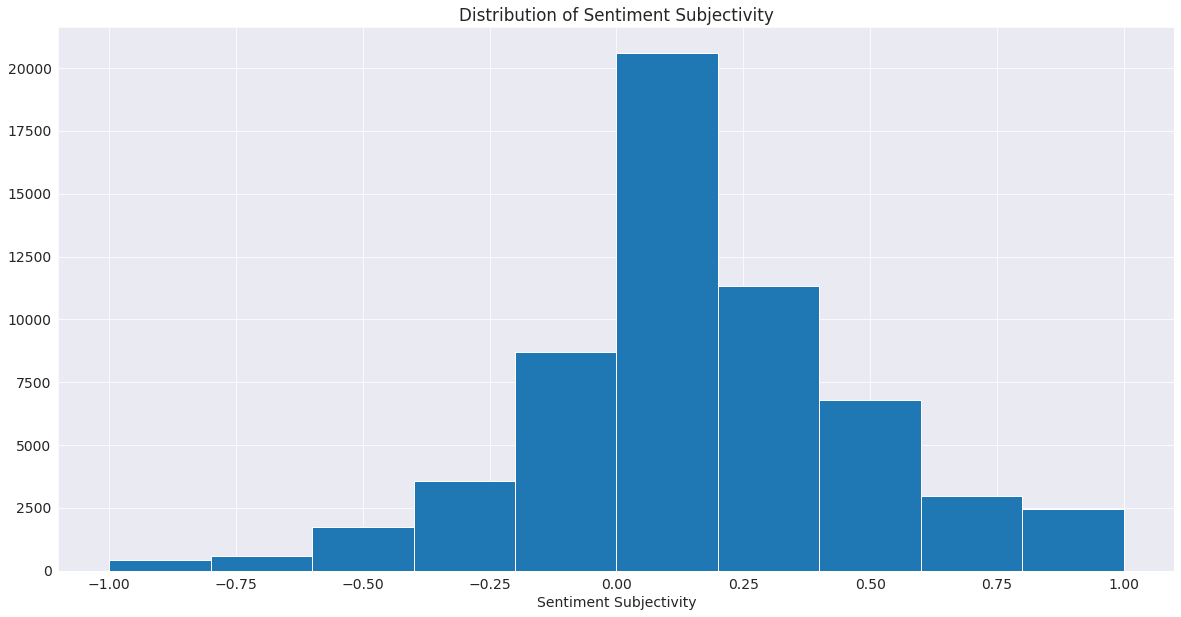

In [339]:
plt.title('Distribution of Sentiment Subjectivity')
plt.xlabel('Sentiment Subjectivity')
plt.hist(merged_df[merged_df.Sentiment_Subjectivity.notnull() == True].Sentiment_Polarity);

From the above histogram, we can clearly see that the maximum of number of sentiment subjectivity lies in between 0.25 and  0.75. 

### Is there a relation between Sentiment Polarity and Sentiment Subjectivity ?

In [372]:
# converting the 'not given' values from Sentiment_Polarity column back to nan for ease 
merged_df.Sentiment_Polarity.replace(inplace = True, to_replace='not given', value = np.nan)

In [379]:
sentiment_subjectivity_and_polarity_df = merged_df.groupby(['Category'])['Sentiment_Polarity','Sentiment_Subjectivity'].mean().reset_index().rename(columns={'Sentiment_Polarity':'Sentiment_polarity_AVG','Sentiment_Subjectivity':'sentiment_subjectivity_AVG'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [380]:
sentiment_subjectivity_and_polarity_df

,Category,Sentiment_polarity_AVG,sentiment_subjectivity_AVG
0,ART_AND_DESIGN,0.370889,0.537098
1,AUTO_AND_VEHICLES,0.384443,0.529918
2,BEAUTY,0.408665,0.494510
3,BOOKS_AND_REFERENCE,0.320854,0.473689
4,BUSINESS,0.322392,0.442212
5,COMICS,0.459495,0.579079
6,COMMUNICATION,0.281273,0.500909
7,DATING,0.308225,0.504210
8,EDUCATION,0.302978,0.488897
9,ENTERTAINMENT,0.266556,0.474363


In [375]:
merged_df.Sentiment_Polarity = merged_df.Sentiment_Polarity.abs()

In [376]:
merged_df.Sentiment_Subjectivity = merged_df.Sentiment_Subjectivity.abs()

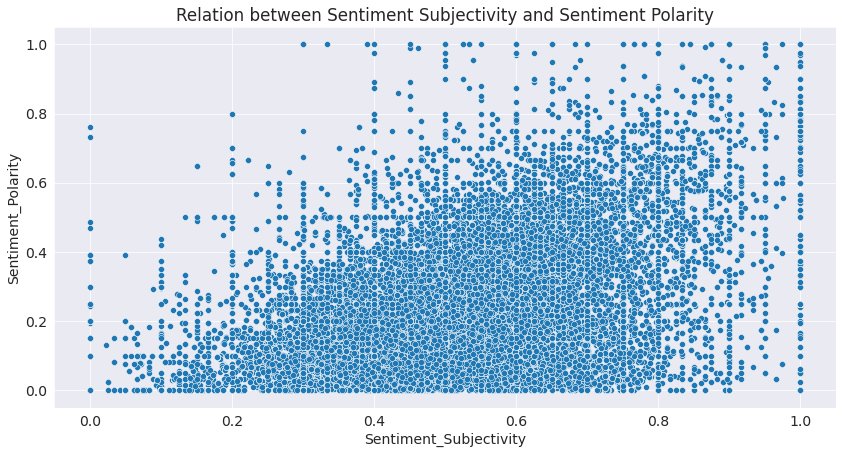

In [390]:
plt.figure(figsize=(14,7))
sns.scatterplot(x = merged_df.Sentiment_Subjectivity, y = merged_df.Sentiment_Polarity)
plt.title("Relation between Sentiment Subjectivity and Sentiment Polarity")
plt.show();

From the above scatterplot, we can make multiple conclusions:

1. Not always are the two columns linearly correlated.

2. The two features are mostly linearly correlated when is either very low or high. In this case, we could also form a line of best fit in the scatterplot above.


### Visualizing the Sentiment Feature

In [405]:
sentiment_dict = dict(merged_df.Sentiment.value_counts())
del sentiment_dict['not given']

In [412]:
sentiment_dict

{'Negative': 15045, 'Neutral': 6572, 'Positive': 37554}

In [414]:
values = list(sentiment_dict.values())
total = sum(list(sentiment_dict.values()))

In [415]:
values

[37554, 15045, 6572]

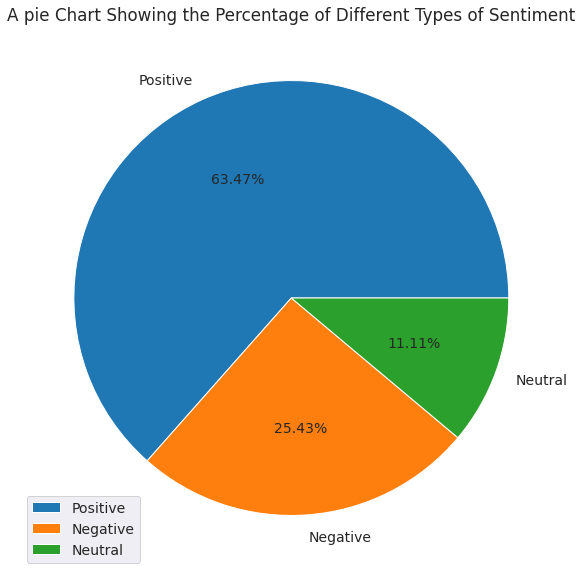

In [419]:
# using pie chart to show the sentiments
plt.title('A pie Chart Showing the Percentage of Different Types of Sentiment')
plt.pie(values, labels = list(sentiment_dict.keys()),autopct="%.2f%%")
plt.legend(labels =list(sentiment_dict.keys()));

In [420]:
sentiment_dict = dict(merged_df.Sentiment.value_counts())
sentiment_dict

{'Negative': 15045, 'Neutral': 6572, 'Positive': 37554, 'not given': 41048}

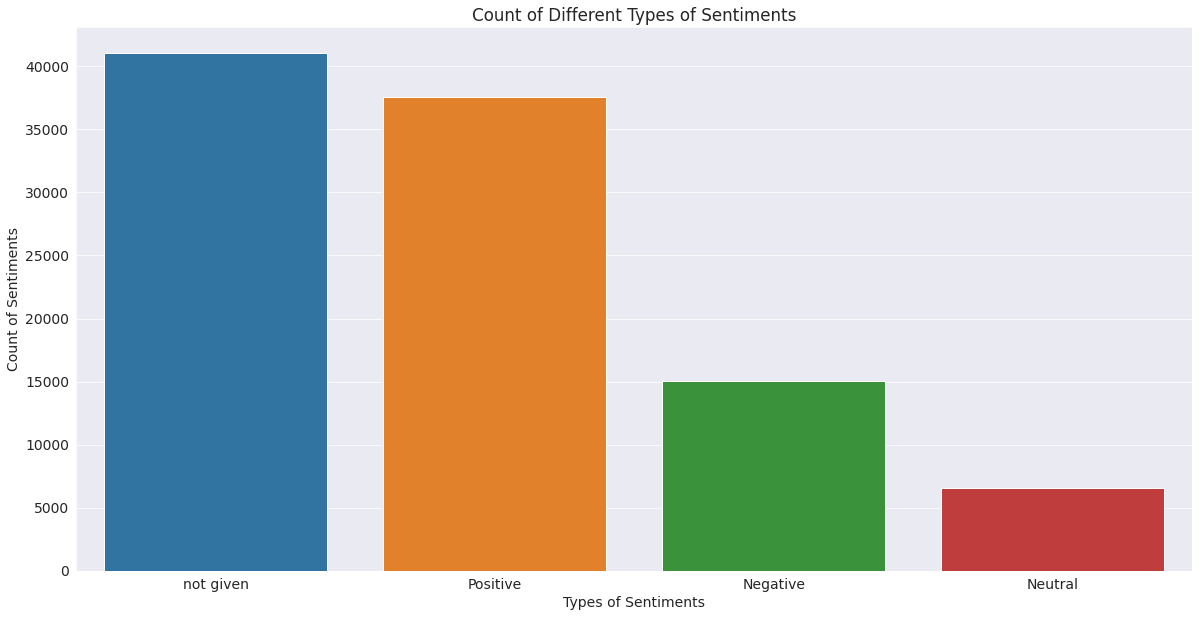

In [424]:
# visualling represent the pie chart through a bar diagram
plt.xlabel('Types of Sentiments')
plt.ylabel('Count of Sentiments')
plt.title('Count of Different Types of Sentiments')
sns.barplot(x = list(sentiment_dict.keys()),y = list(sentiment_dict.values()));

From the bar diagram above, we can see that significant number of values in the dataset's `Sentiment` feature column are missing. Other than that, we can also see that more than 50 % of the sentiments are positive.

# Conclusion

I also took some help from the sites below:
1. [Matplotlib](www.matplotlib.com)

2. [Seaborn](https://www.seaborn.com)

3. [w3Schools](https://www.w3schools.com)

4. [Stack Overflow](https://www.stackoverflow.com)

4. [Jovian](https://www.jovian.com)